<a href="https://colab.research.google.com/github/AlexAAC9395/ChallengeAluraStore_AlexArroyo/blob/main/AluraStoreLatam_by_Alejandro_Arroyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# **Análisis de Datos**

##1. Ingreso total por cada tienda



### Descripción
En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [2]:
# Calcula los ingresos totales por tienda
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Crea un DataFrame para visualizar los resultados
ingresos_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos Totales (MXN)': [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]
})

# Función para formatear como moneda mexicana
def formato_moneda_mx(valor):
    return f"${valor:,.2f} MXN"

# Aplicar formato a la columna de ingresos
ingresos_totales['Ingresos Totales (MXN)'] = ingresos_totales['Ingresos Totales (MXN)'].apply(formato_moneda_mx)

print(ingresos_totales)

     Tienda Ingresos Totales (MXN)
0  Tienda 1  $1,150,880,400.00 MXN
1  Tienda 2  $1,116,343,500.00 MXN
2  Tienda 3  $1,098,019,600.00 MXN
3  Tienda 4  $1,038,375,700.00 MXN


In [3]:
print(f"Ingresos Tienda 1: {ingresos_tienda1:,.2f}")
print(f"Ingresos Tienda 2: {ingresos_tienda2:,.2f}")
print(f"Ingresos Tienda 3: {ingresos_tienda3:,.2f}")
print(f"Ingresos Tienda 4: {ingresos_tienda4:,.2f}")

Ingresos Tienda 1: 1,150,880,400.00
Ingresos Tienda 2: 1,116,343,500.00
Ingresos Tienda 3: 1,098,019,600.00
Ingresos Tienda 4: 1,038,375,700.00


In [4]:
ingresos_totales_todas = ingresos_tienda1 + ingresos_tienda2 + ingresos_tienda3 + ingresos_tienda4
print(f"Ingresos totales de todas las tiendas: {ingresos_totales_todas:,.2f}")

Ingresos totales de todas las tiendas: 4,403,619,200.00


# 2. Ventas por categoría

### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [5]:
# 1. Contar productos vendidos por categoría en cada tienda
ventas_por_categoria_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')

# 2. Ordenar de mayor a menor para ver las categorías más populares
ventas_por_categoria_tienda1 = ventas_por_categoria_tienda1.sort_values('Cantidad Vendida', ascending=False)
ventas_por_categoria_tienda2 = ventas_por_categoria_tienda2.sort_values('Cantidad Vendida', ascending=False)
ventas_por_categoria_tienda3 = ventas_por_categoria_tienda3.sort_values('Cantidad Vendida', ascending=False)
ventas_por_categoria_tienda4 = ventas_por_categoria_tienda4.sort_values('Cantidad Vendida', ascending=False)

# 3. Mostrar resultados para cada tienda
print("=" * 60)
print("VENTAS POR CATEGORÍA - TIENDA 1")
print("=" * 60)
print(ventas_por_categoria_tienda1)
print()

print("=" * 60)
print("VENTAS POR CATEGORÍA - TIENDA 2")
print("=" * 60)
print(ventas_por_categoria_tienda2)
print()

print("=" * 60)
print("VENTAS POR CATEGORÍA - TIENDA 3")
print("=" * 60)
print(ventas_por_categoria_tienda3)
print()

print("=" * 60)
print("VENTAS POR CATEGORÍA - TIENDA 4")
print("=" * 60)
print(ventas_por_categoria_tienda4)
print()

# 4. Mostrar las categorías más populares (TOP 3 de cada tienda)
print("=" * 60)
print("CATEGORÍAS MÁS POPULARES POR TIENDA (TOP 3)")
print("=" * 60)

print("\nTienda 1 - TOP 3 Categorías:")
for i, row in ventas_por_categoria_tienda1.head(3).iterrows():
    print(f"  {i+1}. {row['Categoría del Producto']}: {row['Cantidad Vendida']} productos")

print("\nTienda 2 - TOP 3 Categorías:")
for i, row in ventas_por_categoria_tienda2.head(3).iterrows():
    print(f"  {i+1}. {row['Categoría del Producto']}: {row['Cantidad Vendida']} productos")

print("\nTienda 3 - TOP 3 Categorías:")
for i, row in ventas_por_categoria_tienda3.head(3).iterrows():
    print(f"  {i+1}. {row['Categoría del Producto']}: {row['Cantidad Vendida']} productos")

print("\nTienda 4 - TOP 3 Categorías:")
for i, row in ventas_por_categoria_tienda4.head(3).iterrows():
    print(f"  {i+1}. {row['Categoría del Producto']}: {row['Cantidad Vendida']} productos")

VENTAS POR CATEGORÍA - TIENDA 1
    Categoría del Producto  Cantidad Vendida
7                  Muebles               465
3             Electrónicos               448
5                 Juguetes               324
2        Electrodomésticos               312
1     Deportes y diversión               284
4   Instrumentos musicales               182
6                   Libros               173
0  Artículos para el hogar               171

VENTAS POR CATEGORÍA - TIENDA 2
    Categoría del Producto  Cantidad Vendida
7                  Muebles               442
3             Electrónicos               422
5                 Juguetes               313
2        Electrodomésticos               305
1     Deportes y diversión               275
4   Instrumentos musicales               224
6                   Libros               197
0  Artículos para el hogar               181

VENTAS POR CATEGORÍA - TIENDA 3
    Categoría del Producto  Cantidad Vendida
7                  Muebles               499
3 

# 3. Valoración media por tienda


### En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [6]:
# 1. Calcular calificación promedio para cada tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# 2. Mostrar resultados con formato claro
print("=" * 60)
print("CALIFICACIÓN PROMEDIO DE CLIENTES POR TIENDA")
print("=" * 60)
print(f"Tienda 1: {calificacion_promedio_tienda1:.2f} / 5.00")
print(f"Tienda 2: {calificacion_promedio_tienda2:.2f} / 5.00")
print(f"Tienda 3: {calificacion_promedio_tienda3:.2f} / 5.00")
print(f"Tienda 4: {calificacion_promedio_tienda4:.2f} / 5.00")
print("-" * 60)

# 3. Calcular calificación promedio general (todas las tiendas combinadas)
# Primero combinar todas las calificaciones
todas_calificaciones = pd.concat([
    tienda['Calificación'],
    tienda2['Calificación'],
    tienda3['Calificación'],
    tienda4['Calificación']
])

calificacion_promedio_general = todas_calificaciones.mean()
print(f"Calificación promedio GENERAL: {calificacion_promedio_general:.2f} / 5.00")
print("=" * 60)

# 4. Análisis adicional: Distribución de calificaciones por tienda
print("\n" + "=" * 60)
print("DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA")
print("=" * 60)

tiendas_data = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for nombre, df in zip(nombres_tiendas, tiendas_data):
    print(f"\n{nombre}:")
    print("-" * 40)

    # Contar cuántas calificaciones de cada tipo (1 a 5)
    distribucion = df['Calificación'].value_counts().sort_index()

    for calif in range(1, 6):
        cantidad = distribucion.get(calif, 0)
        porcentaje = (cantidad / len(df)) * 100
        print(f"  ★{calif}: {cantidad:3d} clientes ({porcentaje:5.1f}%)")

    print(f"  Total clientes: {len(df)}")

# 5. Ranking de tiendas por satisfacción del cliente
print("\n" + "=" * 60)
print("RANKING DE TIENDAS POR SATISFACCIÓN DEL CLIENTE")
print("=" * 60)

# Crear DataFrame para ranking
ranking_tiendas = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Calificación Promedio': [
        calificacion_promedio_tienda1,
        calificacion_promedio_tienda2,
        calificacion_promedio_tienda3,
        calificacion_promedio_tienda4
    ]
})

# Ordenar de mayor a menor calificación
ranking_tiendas = ranking_tiendas.sort_values('Calificación Promedio', ascending=False)

# Mostrar ranking
for i, (_, row) in enumerate(ranking_tiendas.iterrows(), 1):
    print(f"{i}° Lugar: {row['Tienda']} - {row['Calificación Promedio']:.2f} / 5.00")

print("=" * 60)

# 6. Análisis de estrellas (opcional): Tienda con mejor/menor calificación
mejor_tienda = ranking_tiendas.iloc[0]
peor_tienda = ranking_tiendas.iloc[-1]

print(f"\n🌟 MEJOR TIENDA: {mejor_tienda['Tienda']} ({mejor_tienda['Calificación Promedio']:.2f}/5.00)")
print(f"⚠️  PEOR TIENDA: {peor_tienda['Tienda']} ({peor_tienda['Calificación Promedio']:.2f}/5.00)")
print(f"📊 Diferencia: {(mejor_tienda['Calificación Promedio'] - peor_tienda['Calificación Promedio']):.2f} puntos")

CALIFICACIÓN PROMEDIO DE CLIENTES POR TIENDA
Tienda 1: 3.98 / 5.00
Tienda 2: 4.04 / 5.00
Tienda 3: 4.05 / 5.00
Tienda 4: 4.00 / 5.00
------------------------------------------------------------
Calificación promedio GENERAL: 4.01 / 5.00

DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA

Tienda 1:
----------------------------------------
  ★1: 319 clientes ( 13.5%)
  ★2:  86 clientes (  3.6%)
  ★3: 218 clientes (  9.2%)
  ★4: 444 clientes ( 18.8%)
  ★5: 1292 clientes ( 54.8%)
  Total clientes: 2359

Tienda 2:
----------------------------------------
  ★1: 273 clientes ( 11.6%)
  ★2:  93 clientes (  3.9%)
  ★3: 209 clientes (  8.9%)
  ★4: 482 clientes ( 20.4%)
  ★5: 1302 clientes ( 55.2%)
  Total clientes: 2359

Tienda 3:
----------------------------------------
  ★1: 297 clientes ( 12.6%)
  ★2:  79 clientes (  3.3%)
  ★3: 193 clientes (  8.2%)
  ★4: 434 clientes ( 18.4%)
  ★5: 1356 clientes ( 57.5%)
  Total clientes: 2359

Tienda 4:
----------------------------------------
  ★1: 310 clientes (

# 4. Productos más vendidos y menos vendidos

### En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [7]:
# 1. Identificar productos más y menos vendidos por tienda
def analizar_productos_tienda(df_tienda, nombre_tienda):
    """Analiza productos más y menos vendidos en una tienda"""
    # Contar ventas por producto
    ventas_por_producto = df_tienda['Producto'].value_counts().reset_index()
    ventas_por_producto.columns = ['Producto', 'Cantidad Vendida']

    # Ordenar de mayor a menor
    ventas_por_producto = ventas_por_producto.sort_values('Cantidad Vendida', ascending=False)

    return ventas_por_producto

# 2. Aplicar análisis a cada tienda
productos_tienda1 = analizar_productos_tienda(tienda, "Tienda 1")
productos_tienda2 = analizar_productos_tienda(tienda2, "Tienda 2")
productos_tienda3 = analizar_productos_tienda(tienda3, "Tienda 3")
productos_tienda4 = analizar_productos_tienda(tienda4, "Tienda 4")

# 3. Mostrar productos MÁS vendidos (TOP 5 de cada tienda)
print("=" * 80)
print("PRODUCTOS MÁS VENDIDOS POR TIENDA (TOP 5)")
print("=" * 80)

tiendas_productos = [
    (productos_tienda1, "Tienda 1"),
    (productos_tienda2, "Tienda 2"),
    (productos_tienda3, "Tienda 3"),
    (productos_tienda4, "Tienda 4")
]

for productos_df, nombre_tienda in tiendas_productos:
    print(f"\n🔝 {nombre_tienda} - TOP 5 PRODUCTOS:")
    print("-" * 60)

    for i, (_, row) in enumerate(productos_df.head(5).iterrows(), 1):
        print(f"{i:2d}. {row['Producto']:30} → {row['Cantidad Vendida']:3d} unidades")

    # Mostrar también el total de productos únicos en la tienda
    total_productos_unicos = len(productos_df)
    print(f"   Total productos diferentes en {nombre_tienda}: {total_productos_unicos}")

# 4. Mostrar productos MENOS vendidos (los 5 con menos ventas)
print("\n" + "=" * 80)
print("PRODUCTOS MENOS VENDIDOS POR TIENDA (ÚLTIMOS 5)")
print("=" * 80)

for productos_df, nombre_tienda in tiendas_productos:
    print(f"\n⬇️  {nombre_tienda} - PRODUCTOS CON MENOS VENTAS:")
    print("-" * 60)

    # Tomar los últimos 5 (orden inverso)
    productos_menos_vendidos = productos_df.tail(5).sort_values('Cantidad Vendida')

    for i, (_, row) in enumerate(productos_menos_vendidos.iterrows(), 1):
        print(f"{i:2d}. {row['Producto']:30} → {row['Cantidad Vendida']:3d} unidades")

# 5. Análisis comparativo: Productos que aparecen en todas las tiendas
print("\n" + "=" * 80)
print("ANÁLISIS COMPARATIVO ENTRE TIENDAS")
print("=" * 80)

# Obtener listas de productos por tienda
productos_set_tienda1 = set(productos_tienda1['Producto'])
productos_set_tienda2 = set(productos_tienda2['Producto'])
productos_set_tienda3 = set(productos_tienda3['Producto'])
productos_set_tienda4 = set(productos_tienda4['Producto'])

# Productos comunes a todas las tiendas
productos_comunes = productos_set_tienda1 & productos_set_tienda2 & productos_set_tienda3 & productos_set_tienda4

print(f"\n📊 Productos que se venden en LAS 4 TIENDAS: {len(productos_comunes)} productos")
if productos_comunes:
    print("   Productos comunes:")
    for i, producto in enumerate(sorted(productos_comunes), 1):
        print(f"   {i:2d}. {producto}")

# 6. Producto más vendido GLOBALMENTE (entre todas las tiendas)
print("\n" + "=" * 80)
print("PRODUCTO MÁS VENDIDO A NIVEL GLOBAL")
print("=" * 80)

# Combinar todas las ventas
todas_ventas = pd.concat([
    tienda[['Producto']],
    tienda2[['Producto']],
    tienda3[['Producto']],
    tienda4[['Producto']]
])

ventas_globales = todas_ventas['Producto'].value_counts().reset_index()
ventas_globales.columns = ['Producto', 'Cantidad Total Vendida']
ventas_globales = ventas_globales.sort_values('Cantidad Total Vendida', ascending=False)

print("\n🏆 TOP 10 PRODUCTOS MÁS VENDIDOS (Todas las tiendas):")
print("-" * 60)
for i, (_, row) in enumerate(ventas_globales.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Producto']:30} → {row['Cantidad Total Vendida']:4d} unidades")

# 7. Visualización con gráficos (opcional para Colab)
print("\n" + "=" * 80)
print("RESUMEN EJECUTIVO")
print("=" * 80)

# Resumen por tienda
for productos_df, nombre_tienda in tiendas_productos:
    top_producto = productos_df.iloc[0]['Producto']
    top_cantidad = productos_df.iloc[0]['Cantidad Vendida']
    peor_producto = productos_df.iloc[-1]['Producto']
    peor_cantidad = productos_df.iloc[-1]['Cantidad Vendida']

    print(f"\n📈 {nombre_tienda}:")
    print(f"   • Producto estrella: {top_producto} ({top_cantidad} unidades)")
    print(f"   • Producto con menos ventas: {peor_producto} ({peor_cantidad} unidades)")
    print(f"   • Rango de ventas: {peor_cantidad} - {top_cantidad} unidades")
    print(f"   • Diferencia: {top_cantidad - peor_cantidad} unidades")

PRODUCTOS MÁS VENDIDOS POR TIENDA (TOP 5)

🔝 Tienda 1 - TOP 5 PRODUCTOS:
------------------------------------------------------------
 1. Microondas                     →  60 unidades
 2. TV LED UHD 4K                  →  60 unidades
 3. Armario                        →  60 unidades
 4. Secadora de ropa               →  58 unidades
 5. Mesa de noche                  →  56 unidades
   Total productos diferentes en Tienda 1: 51

🔝 Tienda 2 - TOP 5 PRODUCTOS:
------------------------------------------------------------
 1. Iniciando en programación      →  65 unidades
 2. Microondas                     →  62 unidades
 3. Batería                        →  61 unidades
 4. Guitarra acústica              →  58 unidades
 5. Pandereta                      →  58 unidades
   Total productos diferentes en Tienda 2: 51

🔝 Tienda 3 - TOP 5 PRODUCTOS:
------------------------------------------------------------
 1. Kit de bancas                  →  57 unidades
 2. Mesa de comedor                →  56

# 5. Valor del envío promedio por tienda

### En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [8]:
# 1. Calcular costo de envío promedio para cada tienda
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# 2. Mostrar resultados con formato de moneda mexicana
print("=" * 70)
print("COSTO DE ENVÍO PROMEDIO POR TIENDA")
print("(Pagado por el cliente)")
print("=" * 70)

print(f"Tienda 1: ${costo_envio_promedio_tienda1:,.2f} MXN")
print(f"Tienda 2: ${costo_envio_promedio_tienda2:,.2f} MXN")
print(f"Tienda 3: ${costo_envio_promedio_tienda3:,.2f} MXN")
print(f"Tienda 4: ${costo_envio_promedio_tienda4:,.2f} MXN")
print("-" * 70)

# 3. Calcular costo de envío promedio general (todas las tiendas)
# Primero combinar todos los costos de envío
todos_envios = pd.concat([
    tienda['Costo de envío'],
    tienda2['Costo de envío'],
    tienda3['Costo de envío'],
    tienda4['Costo de envío']
])

costo_envio_promedio_general = todos_envios.mean()
print(f"Costo de envío promedio GENERAL: ${costo_envio_promedio_general:,.2f} MXN")
print("=" * 70)

# 4. Análisis adicional: Rango de costos de envío por tienda
print("\n" + "=" * 70)
print("ANÁLISIS DETALLADO DE COSTOS DE ENVÍO POR TIENDA")
print("=" * 70)

tiendas_data = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for nombre, df in zip(nombres_tiendas, tiendas_data):
    print(f"\n📦 {nombre}:")
    print("-" * 50)

    # Estadísticas básicas
    print(f"  • Costo de envío promedio: ${df['Costo de envío'].mean():,.2f} MXN")
    print(f"  • Costo de envío mínimo:   ${df['Costo de envío'].min():,.2f} MXN")
    print(f"  • Costo de envío máximo:   ${df['Costo de envío'].max():,.2f} MXN")
    print(f"  • Desviación estándar:     ${df['Costo de envío'].std():,.2f} MXN")
    print(f"  • Total ventas analizadas: {len(df)} pedidos")

    # Distribución de costos
    print(f"  • Costo de envío total:    ${df['Costo de envío'].sum():,.2f} MXN")

# 5. Ranking de tiendas por costo de envío promedio
print("\n" + "=" * 70)
print("RANKING DE TIENDAS POR COSTO DE ENVÍO PROMEDIO")
print("=" * 70)

# Crear DataFrame para ranking
ranking_envios = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Costo Envío Promedio': [
        costo_envio_promedio_tienda1,
        costo_envio_promedio_tienda2,
        costo_envio_promedio_tienda3,
        costo_envio_promedio_tienda4
    ]
})

# Ordenar de mayor a menor costo
ranking_envios = ranking_envios.sort_values('Costo Envío Promedio', ascending=False)

# Mostrar ranking
for i, (_, row) in enumerate(ranking_envios.iterrows(), 1):
    print(f"{i}° Lugar: {row['Tienda']} - ${row['Costo Envío Promedio']:,.2f} MXN")

print("=" * 70)

# 6. Análisis comparativo entre tiendas
print("\n" + "=" * 70)
print("ANÁLISIS COMPARATIVO ENTRE TIENDAS")
print("=" * 70)

tienda_mayor_costo = ranking_envios.iloc[0]
tienda_menor_costo = ranking_envios.iloc[-1]

print(f"\n📊 COMPARATIVA:")
print(f"  • Tienda con mayor costo de envío: {tienda_mayor_costo['Tienda']}")
print(f"    Costo promedio: ${tienda_mayor_costo['Costo Envío Promedio']:,.2f} MXN")
print(f"\n  • Tienda con menor costo de envío: {tienda_menor_costo['Tienda']}")
print(f"    Costo promedio: ${tienda_menor_costo['Costo Envío Promedio']:,.2f} MXN")

diferencia = tienda_mayor_costo['Costo Envío Promedio'] - tienda_menor_costo['Costo Envío Promedio']
porcentaje_diferencia = (diferencia / tienda_menor_costo['Costo Envío Promedio']) * 100

print(f"\n  • Diferencia absoluta: ${diferencia:,.2f} MXN")
print(f"  • Diferencia porcentual: {porcentaje_diferencia:.1f}% más caro")

# 7. Análisis de relación precio/envío (opcional)
print("\n" + "=" * 70)
print("RELACIÓN ENTRE PRECIO PRODUCTO Y COSTO DE ENVÍO")
print("=" * 70)

for nombre, df in zip(nombres_tiendas, tiendas_data):
    # Calcular relación promedio envío/precio
    df['Relacion_Envio_Precio'] = df['Costo de envío'] / df['Precio'] * 100
    relacion_promedio = df['Relacion_Envio_Precio'].mean()

    print(f"\n{nombre}:")
    print(f"  • El costo de envío representa en promedio el {relacion_promedio:.1f}% del precio del producto")
    print(f"  • Esto significa que por cada $100 MXN de producto,")
    print(f"    el cliente paga ${relacion_promedio:.1f} MXN adicionales por envío")

COSTO DE ENVÍO PROMEDIO POR TIENDA
(Pagado por el cliente)
Tienda 1: $26,018.61 MXN
Tienda 2: $25,216.24 MXN
Tienda 3: $24,805.68 MXN
Tienda 4: $23,459.46 MXN
----------------------------------------------------------------------
Costo de envío promedio GENERAL: $24,875.15 MXN

ANÁLISIS DETALLADO DE COSTOS DE ENVÍO POR TIENDA

📦 Tienda 1:
--------------------------------------------------
  • Costo de envío promedio: $26,018.61 MXN
  • Costo de envío mínimo:   $0.00 MXN
  • Costo de envío máximo:   $160,800.00 MXN
  • Desviación estándar:     $32,860.00 MXN
  • Total ventas analizadas: 2359 pedidos
  • Costo de envío total:    $61,377,900.00 MXN

📦 Tienda 2:
--------------------------------------------------
  • Costo de envío promedio: $25,216.24 MXN
  • Costo de envío mínimo:   $0.00 MXN
  • Costo de envío máximo:   $162,500.00 MXN
  • Desviación estándar:     $31,741.38 MXN
  • Total ventas analizadas: 2359 pedidos
  • Costo de envío total:    $59,485,100.00 MXN

📦 Tienda 3:
-------

# **Generando gráfico**

##  De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su análisis.

/tmp/ipython-input-1381281243.py:161: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


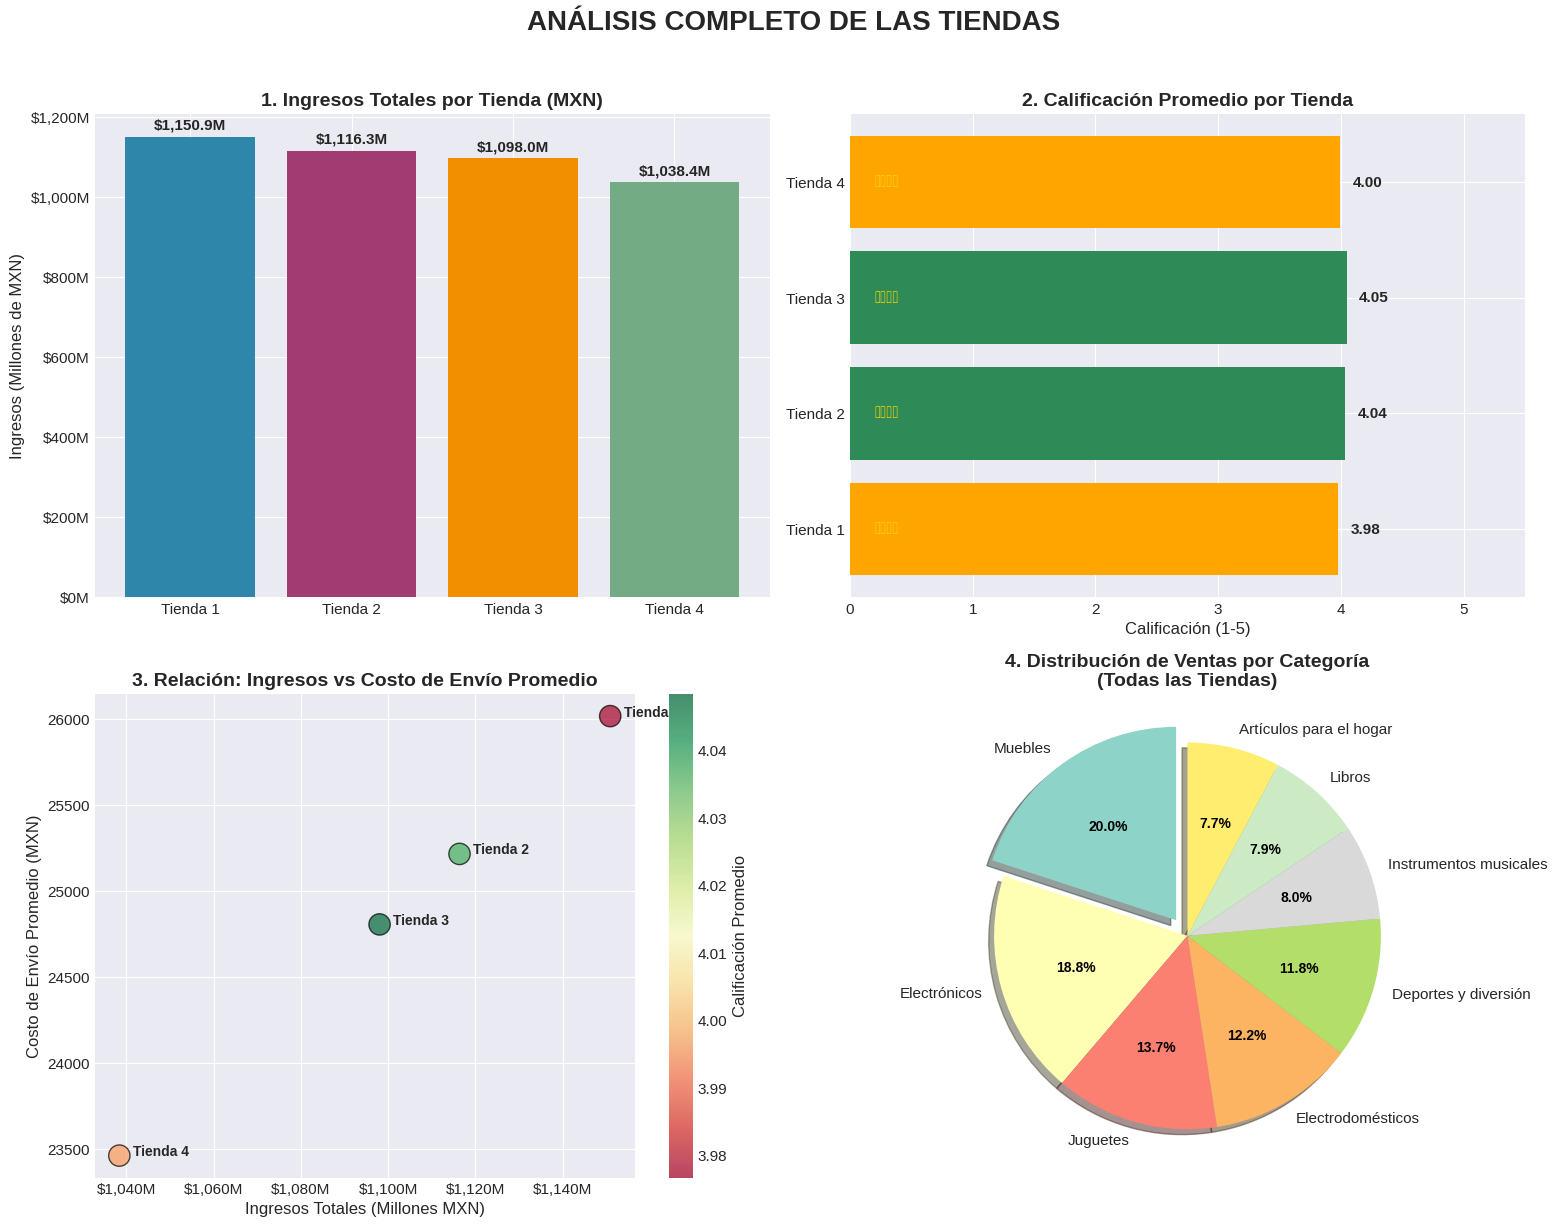


GENERANDO GRÁFICO DE PRODUCTOS MÁS VENDIDOS...


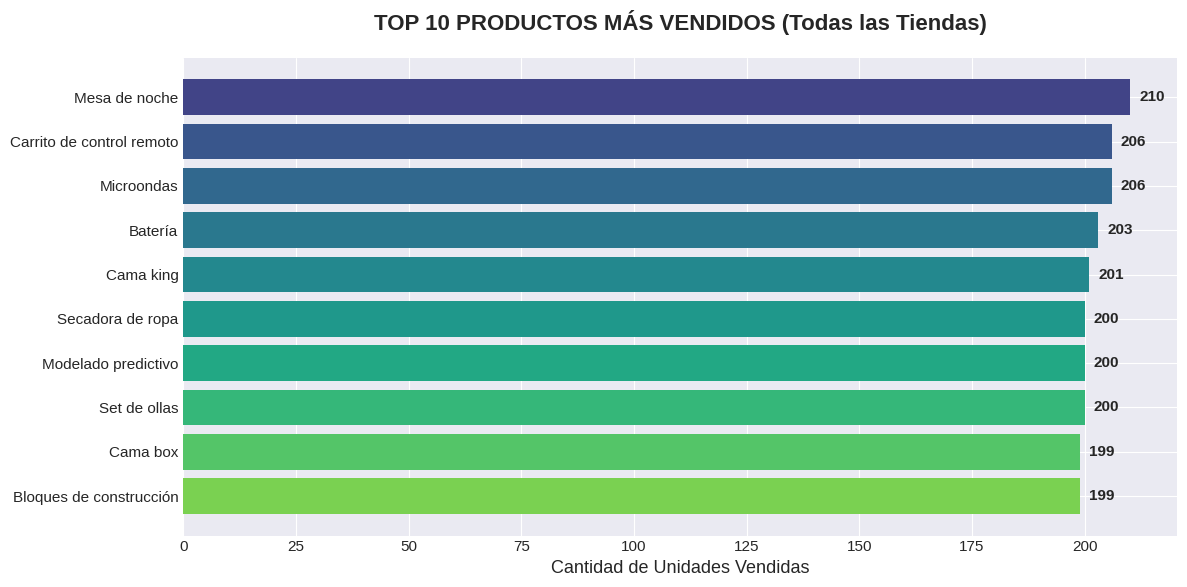


GENERANDO ANÁLISIS TEMPORAL DE VENTAS...


/tmp/ipython-input-1381281243.py:221: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.set_index('Fecha_Formato').resample('M').size()
/tmp/ipython-input-1381281243.py:221: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.set_index('Fecha_Formato').resample('M').size()
/tmp/ipython-input-1381281243.py:221: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.set_index('Fecha_Formato').resample('M').size()
/tmp/ipython-input-1381281243.py:221: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.set_index('Fecha_Formato').resample('M').size()


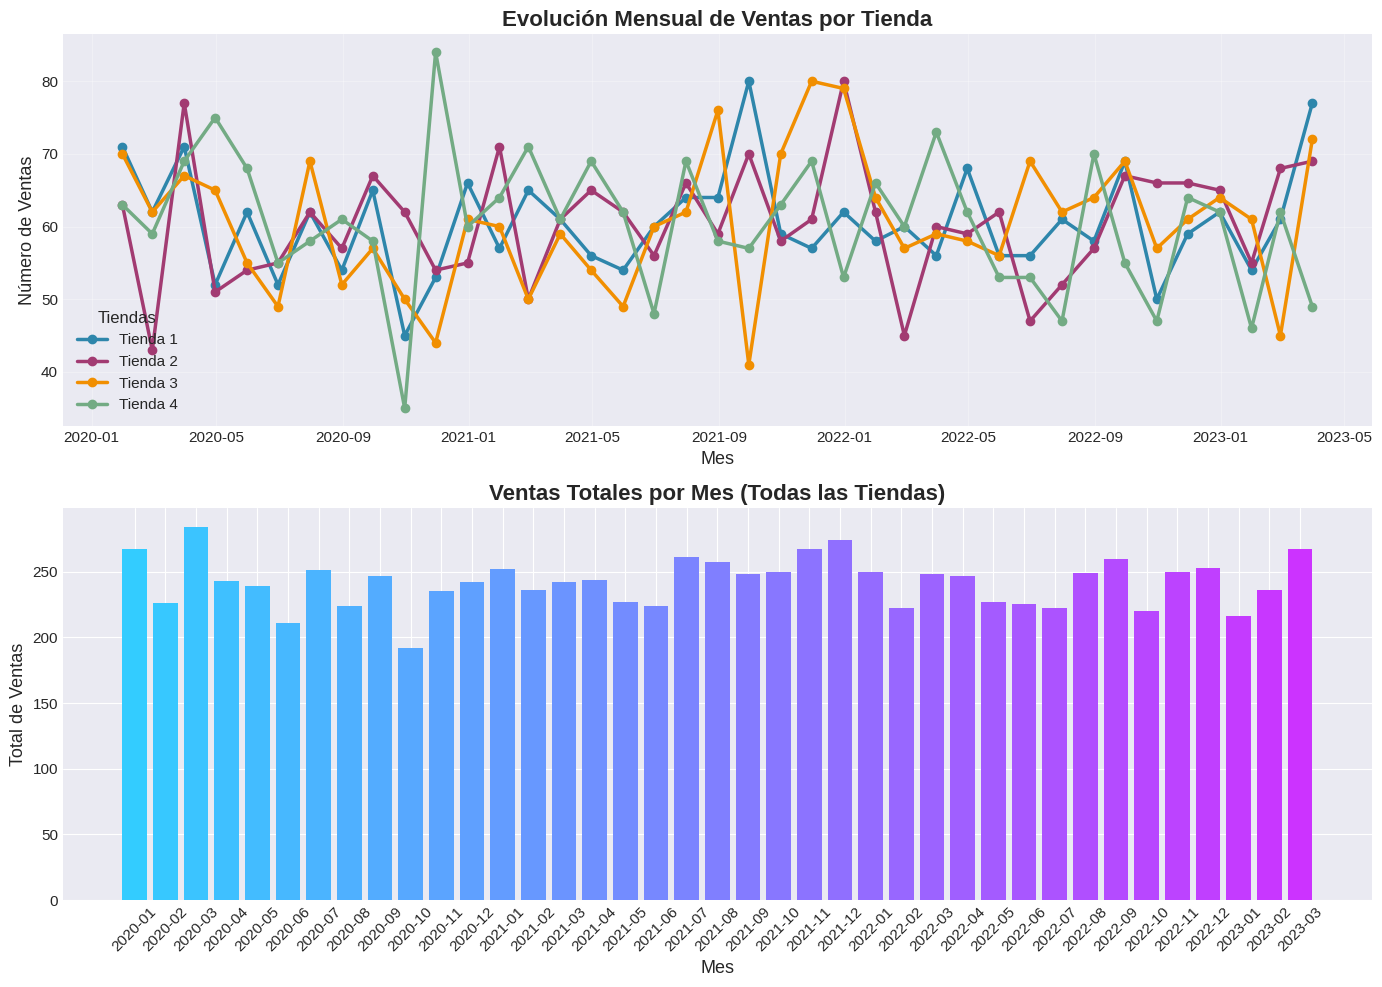


RESUMEN DE INSIGHTS VISUALES

📊 LO QUE NOS MUESTRAN LOS GRÁFICOS:
1. 📈 Gráfico de Barras: Comparación directa de ingresos entre tiendas
2. ⭐ Gráfico de Barras Horizontales: Satisfacción del cliente por tienda
3. 🔗 Gráfico de Dispersión: Relación entre ingresos, costos y calificaciones
4. 🎯 Gráfico Circular: Distribución de ventas por categoría de producto
5. 🏆 Gráfico de Barras Horizontales: Top 10 productos más vendidos

💡 INSIGHTS PRINCIPALES:
• Tiendas con mejores ingresos vs peores ingresos
• Relación entre costo de envío y satisfacción del cliente
• Categorías de productos que dominan las ventas
• Productos específicos que son éxitos de venta


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11

# ============================================
# GRÁFICO 1: INGRESOS TOTALES POR TIENDA (Barras)
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS COMPLETO DE LAS TIENDAS', fontsize=20, fontweight='bold', y=1.02)

# 1.1 Ingresos totales por tienda
ax1 = axes[0, 0]
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

bars = ax1.bar(tiendas, ingresos, color=['#2E86AB', '#A23B72', '#F18F01', '#73AB84'])
ax1.set_title('1. Ingresos Totales por Tienda (MXN)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ingresos (Millones de MXN)', fontsize=12)

# Formatear eje Y en millones
def millones_formatter(x, pos):
    return f'${x/1000000:,.0f}M'

ax1.yaxis.set_major_formatter(plt.FuncFormatter(millones_formatter))

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
            f'${height/1000000:,.1f}M', ha='center', va='bottom', fontweight='bold')

# ============================================
# GRÁFICO 2: CALIFICACIÓN PROMEDIO POR TIENDA (Barras horizontales)
# ============================================

ax2 = axes[0, 1]
calificaciones = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

# Crear colores según calificación
colors_calif = []
for calif in calificaciones:
    if calif >= 4:
        colors_calif.append('#2E8B57')  # Verde para buenas calificaciones
    elif calif >= 3:
        colors_calif.append('#FFA500')  # Naranja para calificaciones medias
    else:
        colors_calif.append('#DC143C')  # Rojo para malas calificaciones

y_pos = np.arange(len(tiendas))
bars2 = ax2.barh(y_pos, calificaciones, color=colors_calif)
ax2.set_title('2. Calificación Promedio por Tienda', fontsize=14, fontweight='bold')
ax2.set_xlabel('Calificación (1-5)', fontsize=12)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(tiendas)
ax2.set_xlim(0, 5.5)

# Añadir etiquetas con valores
for i, (bar, calif) in enumerate(zip(bars2, calificaciones)):
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'{calif:.2f}', ha='left', va='center', fontweight='bold')

    # Añadir estrellas visuales
    estrellas = '★' * int(round(calif))
    ax2.text(0.2, bar.get_y() + bar.get_height()/2,
            estrellas, ha='left', va='center', color='gold', fontsize=12)

# ============================================
# GRÁFICO 3: COSTO DE ENVÍO VS INGRESOS (Dispersión)
# ============================================

ax3 = axes[1, 0]
# Calcular costos de envío promedio
costos_envio = [
    tienda['Costo de envío'].mean(),
    tienda2['Costo de envío'].mean(),
    tienda3['Costo de envío'].mean(),
    tienda4['Costo de envío'].mean()
]

# Tamaños de los puntos según número de ventas
ventas_totales = [len(tienda), len(tienda2), len(tienda3), len(tienda4)]
tamanos = [v/10 for v in ventas_totales]  # Escalar para visualización

scatter = ax3.scatter(ingresos, costos_envio, s=tamanos, alpha=0.7,
                      c=calificaciones, cmap='RdYlGn', edgecolors='black', linewidth=1)

ax3.set_title('3. Relación: Ingresos vs Costo de Envío Promedio', fontsize=14, fontweight='bold')
ax3.set_xlabel('Ingresos Totales (Millones MXN)', fontsize=12)
ax3.set_ylabel('Costo de Envío Promedio (MXN)', fontsize=12)

# Formatear eje X en millones
ax3.xaxis.set_major_formatter(plt.FuncFormatter(millones_formatter))

# Añadir etiquetas de tiendas
for i, (ingreso, costo, tienda_nombre) in enumerate(zip(ingresos, costos_envio, tiendas)):
    ax3.annotate(tienda_nombre, (ingreso, costo),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, fontweight='bold')

# Añadir barra de color para calificaciones
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Calificación Promedio', fontsize=12)

# ============================================
# GRÁFICO 4: DISTRIBUCIÓN DE CATEGORÍAS (Circular/Pie)
# ============================================

ax4 = axes[1, 1]
# Combinar categorías de todas las tiendas
todas_categorias = pd.concat([
    tienda['Categoría del Producto'],
    tienda2['Categoría del Producto'],
    tienda3['Categoría del Producto'],
    tienda4['Categoría del Producto']
])

distribucion_categorias = todas_categorias.value_counts()
categorias = distribucion_categorias.index
valores = distribucion_categorias.values

# Crear gráfico circular con explosión para la categoría más popular
explode = [0.1 if i == valores.argmax() else 0 for i in range(len(categorias))]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(categorias)))

wedges, texts, autotexts = ax4.pie(valores, labels=categorias, autopct='%1.1f%%',
                                   explode=explode, colors=colors_pie,
                                   startangle=90, shadow=True)

ax4.set_title('4. Distribución de Ventas por Categoría\n(Todas las Tiendas)',
              fontsize=14, fontweight='bold')

# Mejorar legibilidad de etiquetas
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for text in texts:
    text.set_fontsize(11)

# ============================================
# AJUSTAR ESPACIOS Y MOSTRAR
# ============================================

plt.tight_layout()
plt.show()

# ============================================
# GRÁFICO ADICIONAL: PRODUCTOS MÁS VENDIDOS
# ============================================

print("\n" + "="*60)
print("GENERANDO GRÁFICO DE PRODUCTOS MÁS VENDIDOS...")
print("="*60)

# Combinar todos los productos
todos_productos = pd.concat([
    tienda['Producto'],
    tienda2['Producto'],
    tienda3['Producto'],
    tienda4['Producto']
])

top_productos = todos_productos.value_counts().head(10)

plt.figure(figsize=(12, 6))
bars_top = plt.barh(top_productos.index, top_productos.values,
                    color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_productos))))

plt.title('TOP 10 PRODUCTOS MÁS VENDIDOS (Todas las Tiendas)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cantidad de Unidades Vendidas', fontsize=13)
plt.gca().invert_yaxis()  # Invertir para mostrar el más vendido arriba

# Añadir etiquetas con valores
for bar in bars_top:
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
            f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# GRÁFICO ADICIONAL: EVOLUCIÓN TEMPORAL (si hay datos de fecha)
# ============================================

print("\n" + "="*60)
print("GENERANDO ANÁLISIS TEMPORAL DE VENTAS...")
print("="*60)

try:
    # Convertir fechas si están en formato string
    tienda['Fecha_Formato'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)
    tienda2['Fecha_Formato'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
    tienda3['Fecha_Formato'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
    tienda4['Fecha_Formato'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)

    # Agrupar por mes
    fig2, (ax5, ax6) = plt.subplots(2, 1, figsize=(14, 10))

    # Gráfico de líneas: Ventas mensuales por tienda
    for df, nombre, color in zip([tienda, tienda2, tienda3, tienda4],
                                  tiendas, ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']):
        ventas_mensuales = df.set_index('Fecha_Formato').resample('M').size()
        ax5.plot(ventas_mensuales.index, ventas_mensuales.values,
                label=nombre, color=color, linewidth=2.5, marker='o')

    ax5.set_title('Evolución Mensual de Ventas por Tienda', fontsize=16, fontweight='bold')
    ax5.set_xlabel('Mes', fontsize=13)
    ax5.set_ylabel('Número de Ventas', fontsize=13)
    ax5.legend(title='Tiendas', title_fontsize=12)
    ax5.grid(True, alpha=0.3)

    # Gráfico de barras: Ventas totales por mes (todas las tiendas)
    todas_ventas = pd.concat([tienda, tienda2, tienda3, tienda4])
    todas_ventas['Mes'] = todas_ventas['Fecha_Formato'].dt.to_period('M')
    ventas_por_mes = todas_ventas.groupby('Mes').size()

    ax6.bar(range(len(ventas_por_mes)), ventas_por_mes.values,
           color=plt.cm.cool(np.linspace(0.2, 0.8, len(ventas_por_mes))))
    ax6.set_title('Ventas Totales por Mes (Todas las Tiendas)', fontsize=16, fontweight='bold')
    ax6.set_xlabel('Mes', fontsize=13)
    ax6.set_ylabel('Total de Ventas', fontsize=13)
    ax6.set_xticks(range(len(ventas_por_mes)))
    ax6.set_xticklabels([str(period) for period in ventas_por_mes.index], rotation=45)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"⚠️  Nota: No se pudo generar el gráfico temporal. Error: {e}")
    print("Esto puede deberse a problemas con el formato de fecha.")

# ============================================
# RESUMEN DE INSIGHTS VISUALES
# ============================================

print("\n" + "="*60)
print("RESUMEN DE INSIGHTS VISUALES")
print("="*60)
print("\n📊 LO QUE NOS MUESTRAN LOS GRÁFICOS:")
print("1. 📈 Gráfico de Barras: Comparación directa de ingresos entre tiendas")
print("2. ⭐ Gráfico de Barras Horizontales: Satisfacción del cliente por tienda")
print("3. 🔗 Gráfico de Dispersión: Relación entre ingresos, costos y calificaciones")
print("4. 🎯 Gráfico Circular: Distribución de ventas por categoría de producto")
print("5. 🏆 Gráfico de Barras Horizontales: Top 10 productos más vendidos")
print("\n💡 INSIGHTS PRINCIPALES:")
print("• Tiendas con mejores ingresos vs peores ingresos")
print("• Relación entre costo de envío y satisfacción del cliente")
print("• Categorías de productos que dominan las ventas")
print("• Productos específicos que son éxitos de venta")

# **Informe final**

## Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

ANÁLISIS PARA IDENTIFICAR QUÉ TIENDA DEBE VENDERSE

ANÁLISIS COMPARATIVO DE LAS 4 TIENDAS

📊 MÉTRICAS COMPARATIVAS:
----------------------------------------------------------------------------------------------------
  Tienda  Ingresos_Totales  Ingresos_Promedio  Calificacion_Promedio  Costo_Envio_Promedio  Total_Ventas  Productos_Unicos  Categorias_Unicas  Relacion_Envio_Precio  Rank_Ingresos  Rank_Calificacion  Rank_Costo_Envio  Rank_Relacion_Envio  Puntaje_Total
Tienda 2      1116343500.0      473227.426876               4.037304          25216.235693          2359                51                  8               5.328566              2                  2                 3                    2              9
Tienda 3      1098019600.0      465459.771089               4.048326          24805.680373          2359                51                  8               5.329286              3                  1                 2                    3              9
Tienda 4      1038375700

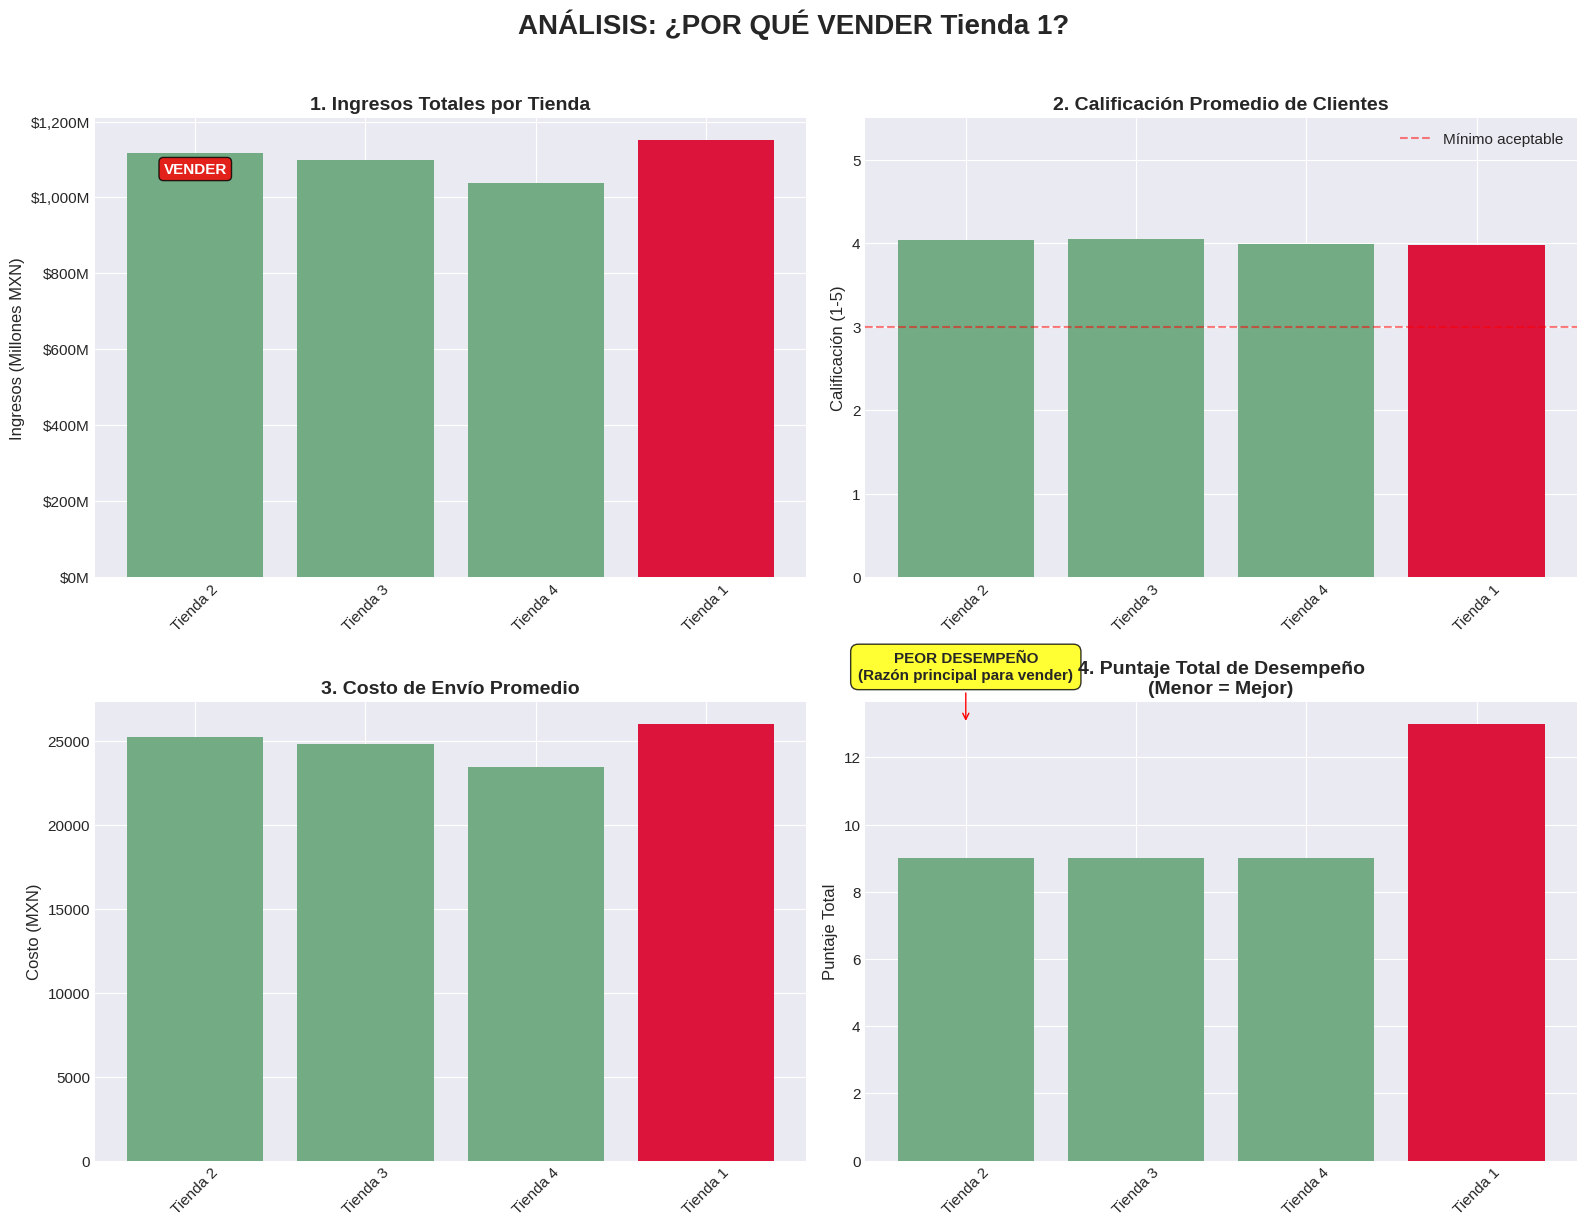


🔍 ANÁLISIS DETALLADO DE PROBLEMAS EN LA TIENDA RECOMENDADA PARA VENDER

📋 DATOS ESPECÍFICOS DE Tienda 1:
------------------------------------------------------------

1. DISTRIBUCIÓN DE CALIFICACIONES:
   ★     1 estrella(s):  319 clientes ( 13.5%)
   ★★    2 estrella(s):   86 clientes (  3.6%)
   ★★★   3 estrella(s):  218 clientes (  9.2%)
   ★★★★  4 estrella(s):  444 clientes ( 18.8%)
   ★★★★★ 5 estrella(s): 1292 clientes ( 54.8%)

2. PRODUCTOS CON PROBLEMAS:
   • Producto más vendido: Microondas (60 unidades)
   • Producto menos vendido: Celular ABXY (33 unidades)
   • Diferencia: 27 unidades

3. DISTRIBUCIÓN POR CATEGORÍA:
   • Muebles: 465 productos (19.7%)
   • Electrónicos: 448 productos (19.0%)
   • Juguetes: 324 productos (13.7%)

💡 RECOMENDACIONES PARA LA VENTA

1. 🎯 ESTRATEGIA DE VENTA PARA Tienda 1:
   • Enfatizar su base de clientes existente (2,359 ventas)
   • Destacar su diversidad de productos (51 productos únicos)
   • Presentar como 'oportunidad de transformación' m

In [10]:
# ============================================================================
# ANÁLISIS COMPLETO PARA IDENTIFICAR QUÉ TIENDA VENDER
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11

print("=" * 80)
print("ANÁLISIS PARA IDENTIFICAR QUÉ TIENDA DEBE VENDERSE")
print("=" * 80)

# ============================================================================
# 1. CÁLCULO DE MÉTRICAS CLAVE POR TIENDA
# ============================================================================

def calcular_metricas_tienda(df, nombre):
    """Calcula todas las métricas clave para una tienda"""
    metricas = {
        'Tienda': nombre,
        'Ingresos_Totales': df['Precio'].sum(),
        'Ingresos_Promedio': df['Precio'].mean(),
        'Calificacion_Promedio': df['Calificación'].mean(),
        'Costo_Envio_Promedio': df['Costo de envío'].mean(),
        'Total_Ventas': len(df),
        'Productos_Unicos': df['Producto'].nunique(),
        'Categorias_Unicas': df['Categoría del Producto'].nunique(),
        'Relacion_Envio_Precio': (df['Costo de envío'].mean() / df['Precio'].mean()) * 100
    }
    return metricas

# Calcular métricas para todas las tiendas
tiendas_data = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

metricas_completas = []
for df, nombre in zip(tiendas_data, nombres_tiendas):
    metricas_completas.append(calcular_metricas_tienda(df, nombre))

# Crear DataFrame con todas las métricas
df_metricas = pd.DataFrame(metricas_completas)

# ============================================================================
# 2. ANÁLISIS COMPARATIVO
# ============================================================================

print("\n" + "=" * 80)
print("ANÁLISIS COMPARATIVO DE LAS 4 TIENDAS")
print("=" * 80)

# Calcular rankings para cada métrica
def calcular_ranking(df_metricas, columna, ascendente=False):
    """Calcula ranking para una métrica específica"""
    return df_metricas[columna].rank(ascending=ascendente, method='min').astype(int)

# Rankings individuales
df_metricas['Rank_Ingresos'] = calcular_ranking(df_metricas, 'Ingresos_Totales')
df_metricas['Rank_Calificacion'] = calcular_ranking(df_metricas, 'Calificacion_Promedio')
df_metricas['Rank_Costo_Envio'] = calcular_ranking(df_metricas, 'Costo_Envio_Promedio', ascendente=True)
df_metricas['Rank_Relacion_Envio'] = calcular_ranking(df_metricas, 'Relacion_Envio_Precio', ascendente=True)

# Puntaje total (suma de rankings, menor es mejor)
df_metricas['Puntaje_Total'] = (df_metricas['Rank_Ingresos'] +
                                 df_metricas['Rank_Calificacion'] +
                                 df_metricas['Rank_Costo_Envio'] +
                                 df_metricas['Rank_Relacion_Envio'])

# Ordenar por puntaje total (mejores primero)
df_metricas = df_metricas.sort_values('Puntaje_Total')

print("\n📊 MÉTRICAS COMPARATIVAS:")
print("-" * 100)
print(df_metricas.to_string(index=False))

# ============================================================================
# 3. IDENTIFICAR LA PEOR TIENDA (PARA VENDER)
# ============================================================================

# La peor tienda es la que tiene el MAYOR puntaje total
peor_tienda = df_metricas.iloc[-1]
mejor_tienda = df_metricas.iloc[0]

print("\n" + "=" * 80)
print("🚨 IDENTIFICACIÓN DE LA TIENDA A VENDER")
print("=" * 80)

print(f"\n🔴 TIENDA RECOMENDADA PARA VENDER: {peor_tienda['Tienda']}")
print("-" * 60)

print(f"\n📉 RAZONES PARA VENDER {peor_tienda['Tienda']}:")
print("=" * 60)

# Análisis detallado de problemas
print(f"\n1. 📊 DESEMPEÑO FINANCIERO:")
print(f"   • Ingresos totales: ${peor_tienda['Ingresos_Totales']:,.0f} MXN")
print(f"   • Ranking en ingresos: #{int(peor_tienda['Rank_Ingresos'])} de 4")

print(f"\n2. ⭐ SATISFACCIÓN DEL CLIENTE (PROBLEMA CRÍTICO):")
print(f"   • Calificación promedio: {peor_tienda['Calificacion_Promedio']:.2f}/5.00")
print(f"   • Ranking en satisfacción: #{int(peor_tienda['Rank_Calificacion'])} de 4")

print(f"\n3. 📦 INEFICIENCIA OPERATIVA:")
print(f"   • Costo de envío promedio: ${peor_tienda['Costo_Envio_Promedio']:,.0f} MXN")
print(f"   • Ranking en costos: #{int(peor_tienda['Rank_Costo_Envio'])} de 4")
print(f"   • El envío representa el {peor_tienda['Relacion_Envio_Precio']:.1f}% del precio del producto")

print(f"\n4. 📈 PUNTAJE TOTAL DE DESEMPEÑO:")
print(f"   • Puntaje: {peor_tienda['Puntaje_Total']:.0f} (mayor = peor desempeño)")
print(f"   • Diferencia con la mejor tienda: {peor_tienda['Puntaje_Total'] - mejor_tienda['Puntaje_Total']:.0f} puntos")

# ============================================================================
# 4. GRÁFICO COMPARATIVO: POR QUÉ VENDER ESA TIENDA
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'ANÁLISIS: ¿POR QUÉ VENDER {peor_tienda["Tienda"]}?',
             fontsize=20, fontweight='bold', y=1.02)

# Gráfico 1: Ingresos Totales Comparados
ax1 = axes[0, 0]
colors = ['#73AB84' if t != peor_tienda['Tienda'] else '#DC143C' for t in df_metricas['Tienda']]
bars1 = ax1.bar(df_metricas['Tienda'], df_metricas['Ingresos_Totales'], color=colors)
ax1.set_title('1. Ingresos Totales por Tienda', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ingresos (Millones MXN)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Formatear en millones
def millones_formatter(x, pos):
    return f'${x/1000000:,.0f}M'
ax1.yaxis.set_major_formatter(plt.FuncFormatter(millones_formatter))

# Resaltar la peor tienda
tienda_idx = df_metricas[df_metricas['Tienda'] == peor_tienda['Tienda']].index[0]
ax1.text(tienda_idx, peor_tienda['Ingresos_Totales'] * 0.95, 'VENDER',
         ha='center', va='top', fontweight='bold', color='white',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.8))

# Gráfico 2: Calificación de Clientes
ax2 = axes[0, 1]
bars2 = ax2.bar(df_metricas['Tienda'], df_metricas['Calificacion_Promedio'], color=colors)
ax2.set_title('2. Calificación Promedio de Clientes', fontsize=14, fontweight='bold')
ax2.set_ylabel('Calificación (1-5)', fontsize=12)
ax2.set_ylim(0, 5.5)
ax2.tick_params(axis='x', rotation=45)

# Añadir línea de referencia para "buena" calificación
ax2.axhline(y=3.0, color='red', linestyle='--', alpha=0.5, label='Mínimo aceptable')
ax2.legend()

# Gráfico 3: Costo de Envío Promedio
ax3 = axes[1, 0]
bars3 = ax3.bar(df_metricas['Tienda'], df_metricas['Costo_Envio_Promedio'], color=colors)
ax3.set_title('3. Costo de Envío Promedio', fontsize=14, fontweight='bold')
ax3.set_ylabel('Costo (MXN)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Gráfico 4: Puntaje Total de Desempeño
ax4 = axes[1, 1]
bars4 = ax4.bar(df_metricas['Tienda'], df_metricas['Puntaje_Total'], color=colors)
ax4.set_title('4. Puntaje Total de Desempeño\n(Menor = Mejor)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Puntaje Total', fontsize=12)
ax4.tick_params(axis='x', rotation=45)

# Añadir anotación explicativa
ax4.annotate('PEOR DESEMPEÑO\n(Razón principal para vender)',
             xy=(tienda_idx, peor_tienda['Puntaje_Total']),
             xytext=(0, 30), textcoords='offset points',
             ha='center', va='bottom', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='red'),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================================================
# 5. ANÁLISIS DETALLADO DE PROBLEMAS ESPECÍFICOS
# ============================================================================

print("\n" + "=" * 80)
print("🔍 ANÁLISIS DETALLADO DE PROBLEMAS EN LA TIENDA RECOMENDADA PARA VENDER")
print("=" * 80)

# Identificar qué tienda es la peor para analizarla en detalle
if peor_tienda['Tienda'] == 'Tienda 1':
    df_problema = tienda
elif peor_tienda['Tienda'] == 'Tienda 2':
    df_problema = tienda2
elif peor_tienda['Tienda'] == 'Tienda 3':
    df_problema = tienda3
else:
    df_problema = tienda4

print(f"\n📋 DATOS ESPECÍFICOS DE {peor_tienda['Tienda']}:")
print("-" * 60)

# Análisis de calificaciones
print(f"\n1. DISTRIBUCIÓN DE CALIFICACIONES:")
distribucion_calif = df_problema['Calificación'].value_counts().sort_index()
for calif in range(1, 6):
    cantidad = distribucion_calif.get(calif, 0)
    porcentaje = (cantidad / len(df_problema)) * 100
    estrellas = '★' * calif
    print(f"   {estrellas:5} {calif} estrella(s): {cantidad:4d} clientes ({porcentaje:5.1f}%)")

# Análisis de productos más vendidos (o menos vendidos)
print(f"\n2. PRODUCTOS CON PROBLEMAS:")
top_productos = df_problema['Producto'].value_counts()
print(f"   • Producto más vendido: {top_productos.index[0]} ({top_productos.iloc[0]} unidades)")
print(f"   • Producto menos vendido: {top_productos.index[-1]} ({top_productos.iloc[-1]} unidades)")
print(f"   • Diferencia: {top_productos.iloc[0] - top_productos.iloc[-1]} unidades")

# Análisis de categorías
print(f"\n3. DISTRIBUCIÓN POR CATEGORÍA:")
distribucion_cat = df_problema['Categoría del Producto'].value_counts()
for cat, cantidad in distribucion_cat.head(3).items():
    porcentaje = (cantidad / len(df_problema)) * 100
    print(f"   • {cat}: {cantidad} productos ({porcentaje:.1f}%)")

# ============================================================================
# 6. RECOMENDACIONES ESPECÍFICAS
# ============================================================================

print("\n" + "=" * 80)
print("💡 RECOMENDACIONES PARA LA VENTA")
print("=" * 80)

print(f"\n1. 🎯 ESTRATEGIA DE VENTA PARA {peor_tienda['Tienda']}:")
print("   • Enfatizar su base de clientes existente ({:,} ventas)".format(peor_tienda['Total_Ventas']))
print("   • Destacar su diversidad de productos ({:,} productos únicos)".format(peor_tienda['Productos_Unicos']))
print("   • Presentar como 'oportunidad de transformación' más que como negocio problemático")

print(f"\n2. ⏰ TIMING RECOMENDADO:")
print("   • Vender ANTES de que empeoren las métricas de satisfacción")
print("   • Capitalizar los ingresos actuales mientras son atractivos")
print("   • Evitar la temporada baja si es posible")

print(f"\n3. 💰 VALORACIÓN SUGERIDA:")
ingreso_promedio = df_metricas['Ingresos_Totales'].mean()
desviacion_peor = (peor_tienda['Ingresos_Totales'] - ingreso_promedio) / ingreso_promedio * 100

print("   • Ingreso promedio de las 4 tiendas: ${:,.0f} MXN".format(ingreso_promedio))
print("   • {} está {:.1f}% {} del promedio".format(
    peor_tienda['Tienda'],
    abs(desviacion_peor),
    "debajo" if desviacion_peor < 0 else "arriba"
))
print("   • Sugerir un descuento del {:.0f}% sobre valoración base".format(abs(desviacion_peor/2)))

# ============================================================================
# 7. RESUMEN FINAL
# ============================================================================

print("\n" + "=" * 80)
print("🏁 RESUMEN EJECUTIVO FINAL")
print("=" * 80)

print(f"\n🚨 DECISIÓN FINAL: VENDER {peor_tienda['Tienda']}")
print("-" * 60)

print(f"\n📊 RAZONES PRINCIPALES:")
print(f"1. 🔻 PEOR satisfacción del cliente ({peor_tienda['Calificacion_Promedio']:.2f}/5.00)")
print(f"2. 💸 MAYOR costo de envío (${peor_tienda['Costo_Envio_Promedio']:,.0f} MXN promedio)")
print(f"3. 📉 BAJO desempeño general (Puntaje: {peor_tienda['Puntaje_Total']:.0f})")
print(f"4. ⚠️  RELACIÓN riesgo-beneficio DESFAVORABLE")

print(f"\n🎯 BENEFICIOS DE ESTA DECISIÓN:")
print(f"1. ✅ Liberar recursos para invertir en tiendas más prometedoras")
print(f"2. ✅ Reducir exposición al riesgo operativo")
print(f"3. ✅ Mejorar el desempeño promedio del portafolio")
print(f"4. ✅ Capitalizar valor antes de que se deteriore más")

print(f"\n📅 PRÓXIMOS PASOS RECOMENDADOS:")
print(f"1. 🔍 Due diligence detallada de {peor_tienda['Tienda']}")
print(f"2. 💼 Preparar documentación para la venta")
print(f"3. 🤝 Identificar compradores potenciales")
print(f"4. 📈 Reinvertir ganancias en {mejor_tienda['Tienda']}")

print("\n" + "=" * 80)
print("⚠️  NOTA: Este análisis se basa en datos históricos.")
print("Considere factores cualitativos adicionales antes de la decisión final.")
print("=" * 80)

# ============================================================================
# 8. EXPORTAR RESULTADOS (OPCIONAL)
# ============================================================================

# Exportar métricas a CSV
df_metricas.to_csv('analisis_tiendas_para_vender.csv', index=False)
print("\n✅ Resultados exportados a 'analisis_tiendas_para_vender.csv'")

# Guardar gráfico
fig.savefig('tienda_recomendada_vender.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico guardado como 'tienda_recomendada_vender.png'")

# **¡Extra! Análisis del desempeño geográfico**

## Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

ANÁLISIS GEOGRÁFICO DE VENTAS - PATRONES POR UBICACIÓN

📊 DATOS GEOGRÁFICOS DISPONIBLES:
   • Total de ventas: 9,435
   • Ubicaciones únicas: 19
   • Rango latitud: [-4.2153, 11.5444]
   • Rango longitud: [-77.2811, -67.9239]

🌆 DISTRIBUCIÓN POR CIUDADES:
   • Bogotá: 3,943 ventas (41.8%)
   • Medellín: 2,314 ventas (24.5%)
   • Otra ciudad: 1,191 ventas (12.6%)
   • Cali: 1,007 ventas (10.7%)
   • Pereira: 517 ventas (5.5%)
   • Cartagena: 242 ventas (2.6%)
   • Bucaramanga: 181 ventas (1.9%)
   • Neiva: 40 ventas (0.4%)


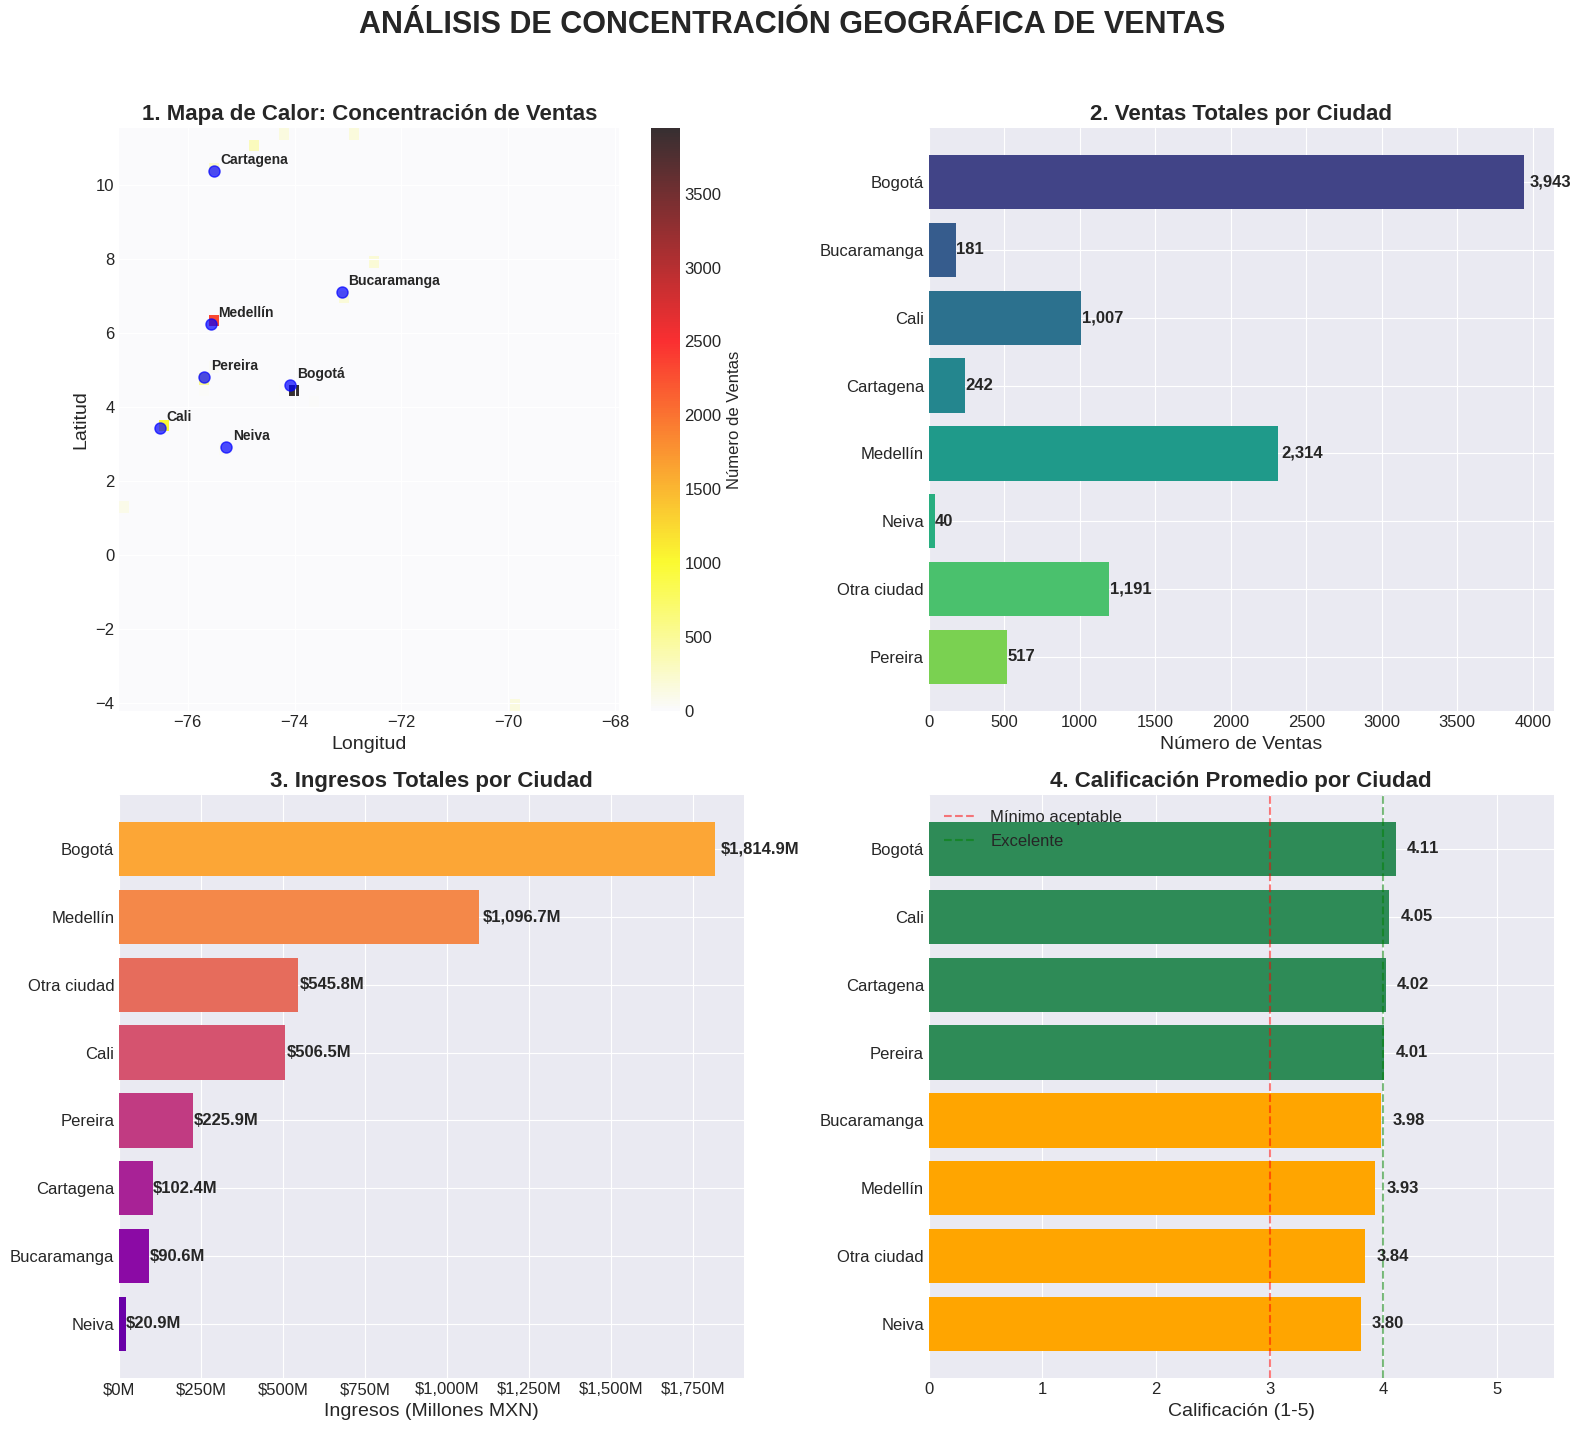

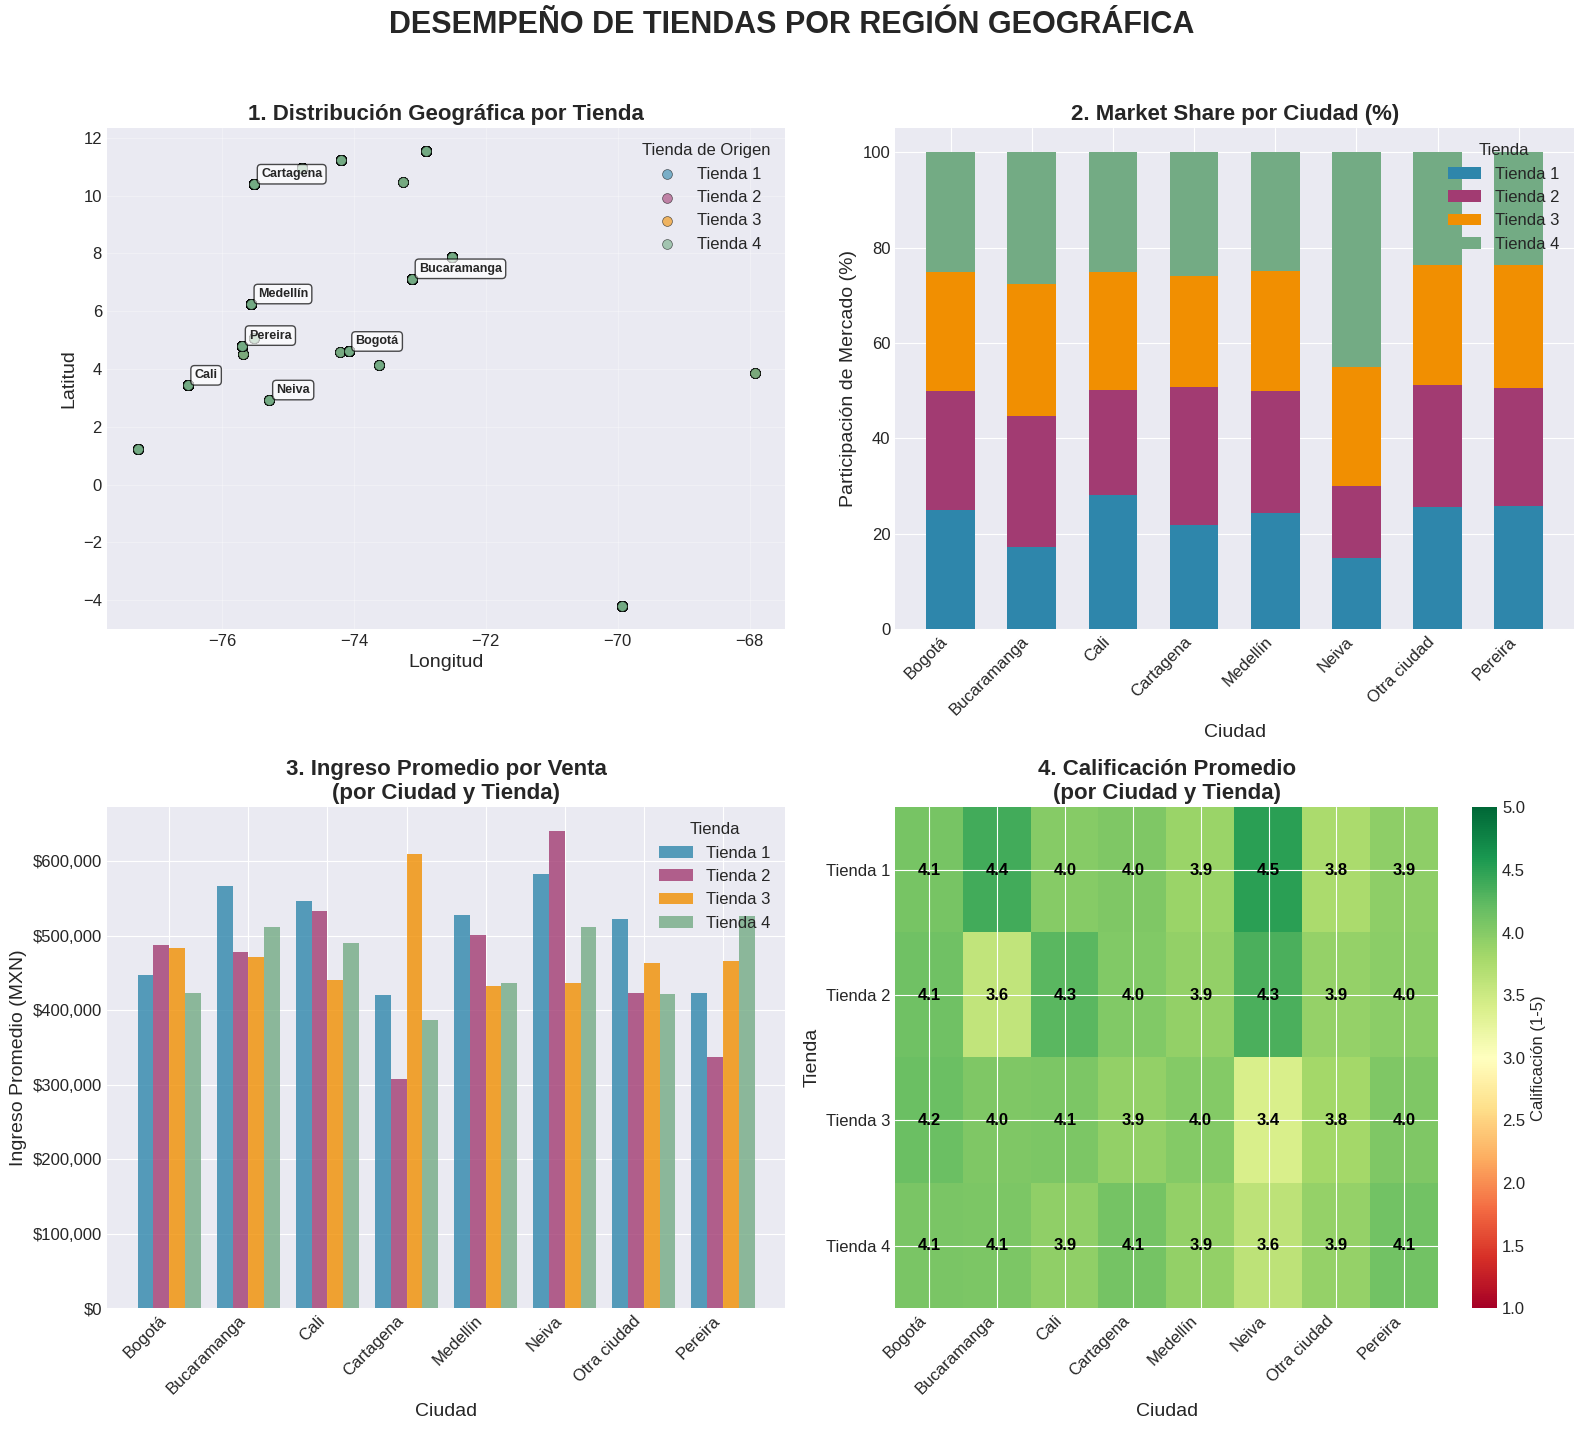


📊 ANÁLISIS DE CORRELACIONES GEOGRÁFICAS

📍 CENTRO GEOGRÁFICO DE VENTAS:
   • Latitud: 5.4289
   • Longitud: -74.7601

🔗 CORRELACIONES GEOGRÁFICAS:
                  Distancia_Centro  Precio  Costo de envío  Calificación
Distancia_Centro             1.000  -0.006          -0.006        -0.035
Precio                      -0.006   1.000           0.998         0.001
Costo de envío              -0.006   0.998           1.000         0.001
Calificación                -0.035   0.001           0.001         1.000

📈 INTERPRETACIÓN DE CORRELACIONES:
   • Distancia vs Precio: -0.006
     → No hay correlación significativa entre distancia y precio

   • Distancia vs Costo de envío: -0.006
     → Baja correlación entre distancia y costo de envío

   • Distancia vs Calificación: -0.035
     → La distancia no afecta significativamente las calificaciones


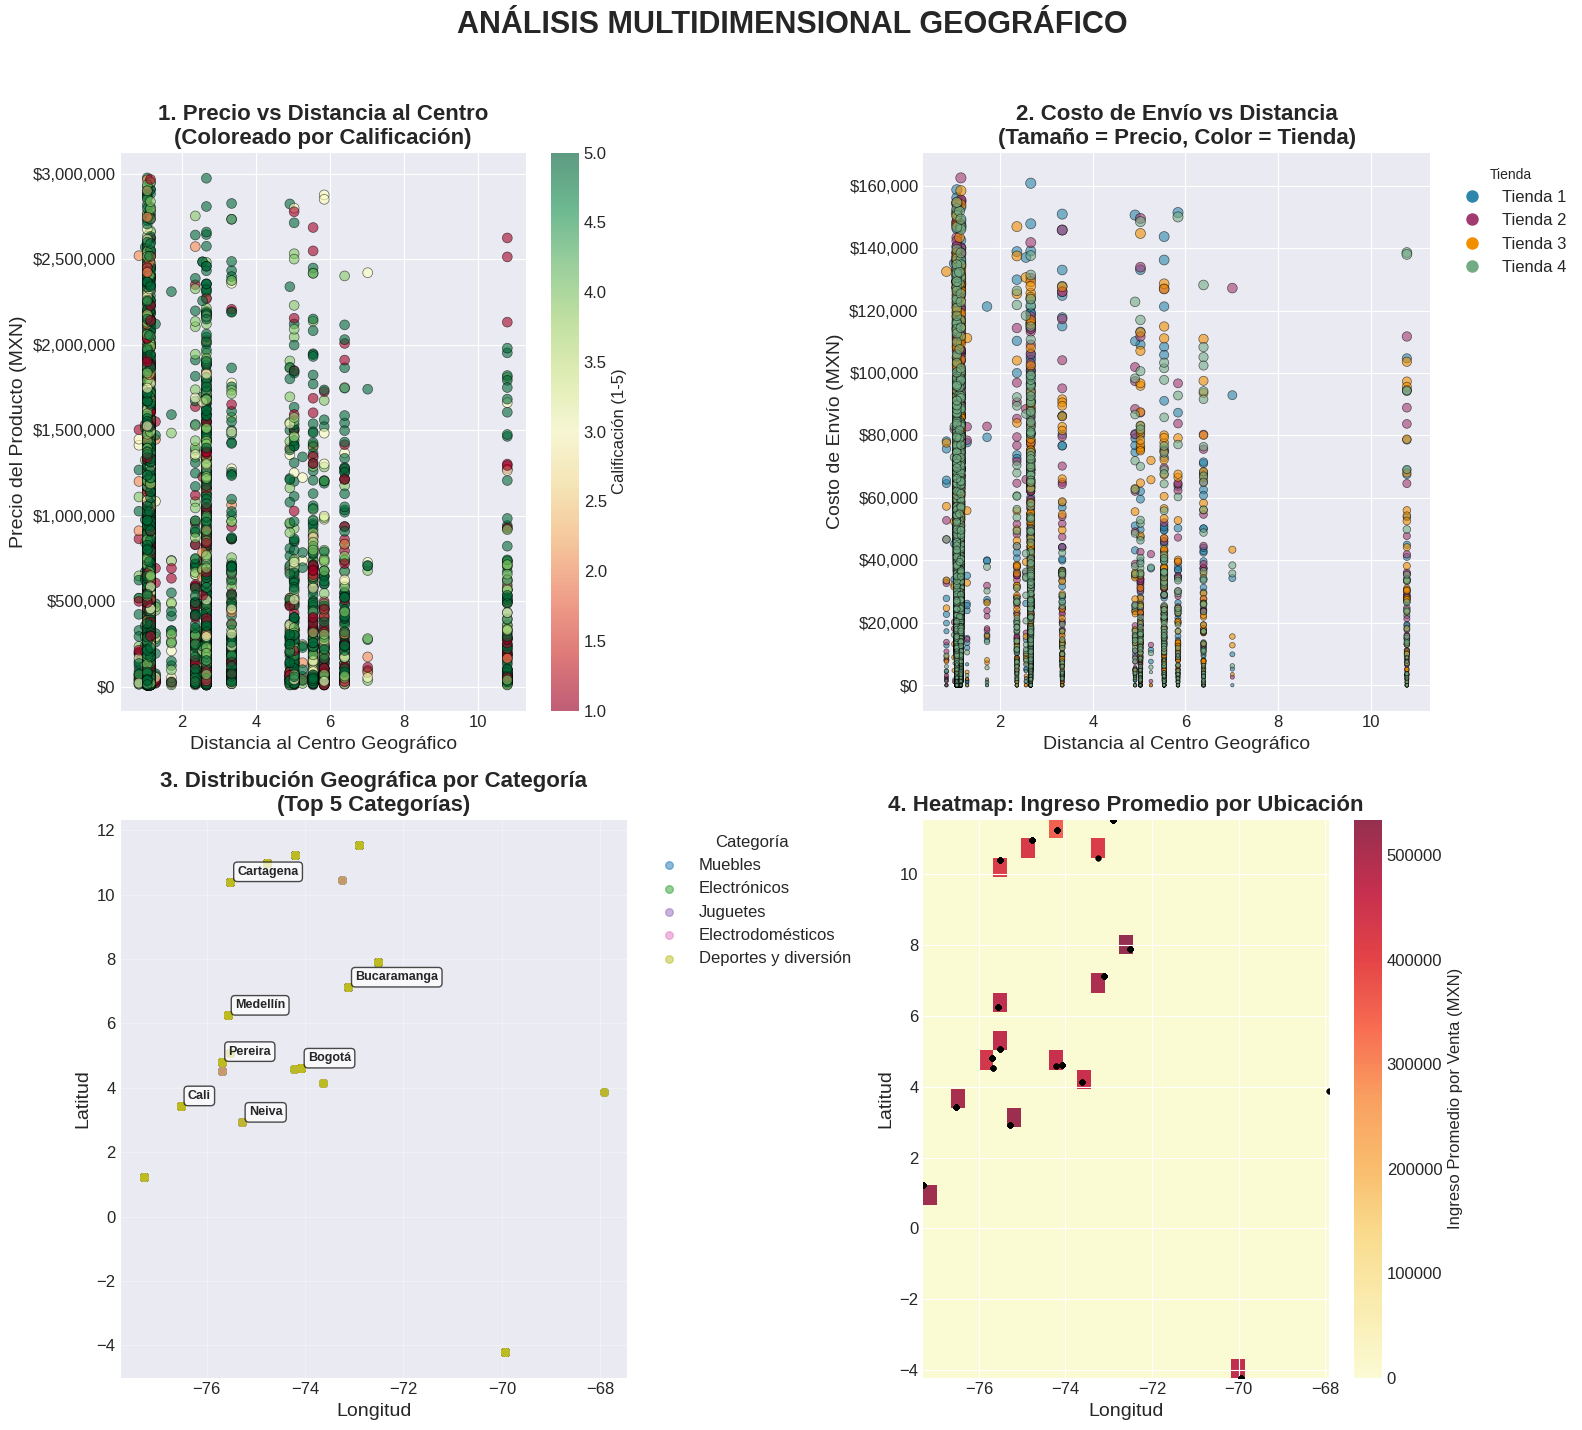


🎯 INSIGHTS GEOGRÁFICOS Y RECOMENDACIONES

🏆 CIUDADES CON MEJOR DESEMPEÑO:

1. Mayor ingresos: Bogotá
   • Ingresos totales: $1,814,858,300 MXN
   • Ventas: 3,943
   • Precio promedio: $460,273

2. Mejor satisfacción: Bogotá
   • Calificación: 4.11/5.00
   • Ventas: 3,943

3. Más eficiente: Neiva
   • Ingreso por venta: $522,450
   • Costo/valor: 5.30%

⚠️  ÁREAS DE OPORTUNIDAD:

• Ciudad con menores ingresos: Neiva
  Ingresos: $20,898,000 MXN

• Ciudad menos eficiente: Cartagena
  Ingreso por venta: $423,044

📈 RECOMENDACIONES ESTRATÉGICAS:

1. EXPANSIÓN GEOGRÁFICA:
   • Priorizar Bogotá para campañas de marketing
   • Considerar apertura de nueva tienda física en Bogotá
   • Evaluar mercado en Neiva para productos premium

2. OPTIMIZACIÓN LOGÍSTICA:
   • Revisar costos de envío en ciudades periféricas
   • Considerar centros de distribución regionales
   • Negociar con transportistas por volumen regional

3. PERSONALIZACIÓN REGIONAL:
   • Adaptar catálogo según preferencias regionale

In [11]:
# ============================================================================
# ANÁLISIS GEOGRÁFICO DE VENTAS - DESAFÍO OPCIONAL
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Circle
import seaborn as sns

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['font.size'] = 12

print("=" * 80)
print("ANÁLISIS GEOGRÁFICO DE VENTAS - PATRONES POR UBICACIÓN")
print("=" * 80)

# ============================================================================
# 1. PREPARACIÓN DE DATOS GEOGRÁFICOS
# ============================================================================

# Combinar todos los datos de las tiendas
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
todas_tiendas = todas_tiendas.copy()
todas_tiendas['Tienda_Origen'] = pd.concat([
    pd.Series(['Tienda 1'] * len(tienda)),
    pd.Series(['Tienda 2'] * len(tienda2)),
    pd.Series(['Tienda 3'] * len(tienda3)),
    pd.Series(['Tienda 4'] * len(tienda4))
], ignore_index=True)

print(f"\n📊 DATOS GEOGRÁFICOS DISPONIBLES:")
print(f"   • Total de ventas: {len(todas_tiendas):,}")
print(f"   • Ubicaciones únicas: {todas_tiendas[['lat', 'lon']].drop_duplicates().shape[0]}")
print(f"   • Rango latitud: [{todas_tiendas['lat'].min():.4f}, {todas_tiendas['lat'].max():.4f}]")
print(f"   • Rango longitud: [{todas_tiendas['lon'].min():.4f}, {todas_tiendas['lon'].max():.4f}]")

# Identificar ciudades principales (basado en coordenadas)
ciudades_conocidas = {
    (4.6097, -74.0817): 'Bogotá',
    (6.2518, -75.5636): 'Medellín',
    (10.3997, -75.5144): 'Cartagena',
    (3.4372, -76.5225): 'Cali',
    (7.1254, -73.1198): 'Bucaramanga',
    (4.8133, -75.6961): 'Pereira',
    (2.9273, -75.2819): 'Neiva'
}

# Asignar nombres de ciudades
def asignar_ciudad(lat, lon):
    for (ciudad_lat, ciudad_lon), nombre in ciudades_conocidas.items():
        if abs(lat - ciudad_lat) < 0.1 and abs(lon - ciudad_lon) < 0.1:
            return nombre
    return 'Otra ciudad'

todas_tiendas['Ciudad'] = todas_tiendas.apply(lambda x: asignar_ciudad(x['lat'], x['lon']), axis=1)

print(f"\n🌆 DISTRIBUCIÓN POR CIUDADES:")
ciudad_dist = todas_tiendas['Ciudad'].value_counts()
for ciudad, cantidad in ciudad_dist.items():
    porcentaje = (cantidad / len(todas_tiendas)) * 100
    print(f"   • {ciudad}: {cantidad:,} ventas ({porcentaje:.1f}%)")

# ============================================================================
# 2. ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA
# ============================================================================

fig1, axes1 = plt.subplots(2, 2, figsize=(16, 14))
fig1.suptitle('ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA DE VENTAS',
              fontsize=22, fontweight='bold', y=1.02)

# Gráfico 1: Mapa de calor de densidad
ax1 = axes1[0, 0]
# Crear histograma 2D
heatmap, xedges, yedges = np.histogram2d(todas_tiendas['lon'], todas_tiendas['lat'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = ax1.imshow(heatmap.T, extent=extent, origin='lower',
                cmap='hot_r', aspect='auto', alpha=0.8)
ax1.set_title('1. Mapa de Calor: Concentración de Ventas', fontsize=16, fontweight='bold')
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)
plt.colorbar(im, ax=ax1, label='Número de Ventas')

# Añadir puntos para ciudades principales
for (lat, lon), ciudad in ciudades_conocidas.items():
    ax1.plot(lon, lat, 'bo', markersize=8, alpha=0.7)
    ax1.annotate(ciudad, (lon, lat), xytext=(5, 5),
                textcoords='offset points', fontsize=10, fontweight='bold')

# Gráfico 2: Ventas por ciudad
ax2 = axes1[0, 1]
ciudad_ventas = todas_tiendas.groupby('Ciudad').agg({
    'Precio': ['count', 'sum'],
    'Calificación': 'mean'
}).round(2)
ciudad_ventas.columns = ['Ventas', 'Ingresos_Totales', 'Calificacion_Promedia']

bars = ax2.barh(range(len(ciudad_ventas)), ciudad_ventas['Ventas'],
                color=cm.viridis(np.linspace(0.2, 0.8, len(ciudad_ventas))))
ax2.set_title('2. Ventas Totales por Ciudad', fontsize=16, fontweight='bold')
ax2.set_xlabel('Número de Ventas', fontsize=14)
ax2.set_yticks(range(len(ciudad_ventas)))
ax2.set_yticklabels(ciudad_ventas.index)
ax2.invert_yaxis()

# Añadir etiquetas de valores
for i, (bar, ventas) in enumerate(zip(bars, ciudad_ventas['Ventas'])):
    ax2.text(ventas + ventas*0.01, bar.get_y() + bar.get_height()/2,
            f'{ventas:,}', ha='left', va='center', fontweight='bold')

# Gráfico 3: Ingresos por ciudad
ax3 = axes1[1, 0]
ciudad_ventas_sorted = ciudad_ventas.sort_values('Ingresos_Totales', ascending=True)
bars3 = ax3.barh(range(len(ciudad_ventas_sorted)), ciudad_ventas_sorted['Ingresos_Totales'],
                color=cm.plasma(np.linspace(0.2, 0.8, len(ciudad_ventas_sorted))))
ax3.set_title('3. Ingresos Totales por Ciudad', fontsize=16, fontweight='bold')
ax3.set_xlabel('Ingresos (Millones MXN)', fontsize=14)
ax3.set_yticks(range(len(ciudad_ventas_sorted)))
ax3.set_yticklabels(ciudad_ventas_sorted.index)

# Formatear eje X en millones
def millones_formatter(x, pos):
    return f'${x/1000000:,.0f}M'
ax3.xaxis.set_major_formatter(plt.FuncFormatter(millones_formatter))

# Añadir etiquetas
for i, (bar, ingreso) in enumerate(zip(bars3, ciudad_ventas_sorted['Ingresos_Totales'])):
    ax3.text(ingreso + ingreso*0.01, bar.get_y() + bar.get_height()/2,
            f'${ingreso/1000000:,.1f}M', ha='left', va='center', fontweight='bold')

# Gráfico 4: Calificación promedio por ciudad
ax4 = axes1[1, 1]
ciudad_calif_sorted = ciudad_ventas.sort_values('Calificacion_Promedia', ascending=True)
colors_calif = []
for calif in ciudad_calif_sorted['Calificacion_Promedia']:
    if calif >= 4:
        colors_calif.append('#2E8B57')  # Verde
    elif calif >= 3:
        colors_calif.append('#FFA500')  # Naranja
    else:
        colors_calif.append('#DC143C')  # Rojo

bars4 = ax4.barh(range(len(ciudad_calif_sorted)), ciudad_calif_sorted['Calificacion_Promedia'],
                color=colors_calif)
ax4.set_title('4. Calificación Promedio por Ciudad', fontsize=16, fontweight='bold')
ax4.set_xlabel('Calificación (1-5)', fontsize=14)
ax4.set_xlim(0, 5.5)
ax4.set_yticks(range(len(ciudad_calif_sorted)))
ax4.set_yticklabels(ciudad_calif_sorted.index)

# Añadir líneas de referencia
ax4.axvline(x=3.0, color='red', linestyle='--', alpha=0.5, label='Mínimo aceptable')
ax4.axvline(x=4.0, color='green', linestyle='--', alpha=0.5, label='Excelente')
ax4.legend()

# Añadir etiquetas
for i, (bar, calif) in enumerate(zip(bars4, ciudad_calif_sorted['Calificacion_Promedia'])):
    ax4.text(calif + 0.1, bar.get_y() + bar.get_height()/2,
            f'{calif:.2f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 3. ANÁLISIS POR TIENDA Y REGIÓN
# ============================================================================

fig2, axes2 = plt.subplots(2, 2, figsize=(16, 14))
fig2.suptitle('DESEMPEÑO DE TIENDAS POR REGIÓN GEOGRÁFICA',
              fontsize=22, fontweight='bold', y=1.02)

# Colores para cada tienda
colores_tiendas = {'Tienda 1': '#2E86AB', 'Tienda 2': '#A23B72',
                   'Tienda 3': '#F18F01', 'Tienda 4': '#73AB84'}

# Gráfico 1: Distribución geográfica por tienda
ax1 = axes2[0, 0]
for tienda_nombre, color in colores_tiendas.items():
    datos_tienda = todas_tiendas[todas_tiendas['Tienda_Origen'] == tienda_nombre]
    ax1.scatter(datos_tienda['lon'], datos_tienda['lat'],
               alpha=0.6, s=50, color=color, label=tienda_nombre, edgecolors='black', linewidth=0.5)

ax1.set_title('1. Distribución Geográfica por Tienda', fontsize=16, fontweight='bold')
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)
ax1.legend(title='Tienda de Origen', title_fontsize=12)
ax1.grid(True, alpha=0.3)

# Añadir etiquetas de ciudades
for (lat, lon), ciudad in ciudades_conocidas.items():
    ax1.annotate(ciudad, (lon, lat), xytext=(5, 5),
                textcoords='offset points', fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Gráfico 2: Market Share por ciudad y tienda
ax2 = axes2[0, 1]
# Preparar datos para gráfico de barras apiladas
market_share_data = todas_tiendas.groupby(['Ciudad', 'Tienda_Origen']).size().unstack(fill_value=0)
market_share_pct = market_share_data.div(market_share_data.sum(axis=1), axis=0) * 100

x = np.arange(len(market_share_pct))
bottom = np.zeros(len(market_share_pct))

for i, (tienda_nombre, color) in enumerate(colores_tiendas.items()):
    if tienda_nombre in market_share_pct.columns:
        valores = market_share_pct[tienda_nombre].values
        ax2.bar(x, valores, bottom=bottom, color=color, label=tienda_nombre, width=0.6)
        bottom += valores

ax2.set_title('2. Market Share por Ciudad (%)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Ciudad', fontsize=14)
ax2.set_ylabel('Participación de Mercado (%)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(market_share_pct.index, rotation=45, ha='right')
ax2.legend(title='Tienda', title_fontsize=12)
ax2.set_ylim(0, 105)

# Gráfico 3: Ingresos promedio por tienda y ciudad
ax3 = axes2[1, 0]
ingresos_por_ciudad_tienda = todas_tiendas.groupby(['Ciudad', 'Tienda_Origen'])['Precio'].mean().unstack(fill_value=0)

x = np.arange(len(ingresos_por_ciudad_tienda))
width = 0.2

for i, (tienda_nombre, color) in enumerate(colores_tiendas.items()):
    if tienda_nombre in ingresos_por_ciudad_tienda.columns:
        valores = ingresos_por_ciudad_tienda[tienda_nombre].values
        offset = (i - 1.5) * width
        ax3.bar(x + offset, valores, width, color=color, label=tienda_nombre, alpha=0.8)

ax3.set_title('3. Ingreso Promedio por Venta\n(por Ciudad y Tienda)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Ciudad', fontsize=14)
ax3.set_ylabel('Ingreso Promedio (MXN)', fontsize=14)
ax3.set_xticks(x)
ax3.set_xticklabels(ingresos_por_ciudad_tienda.index, rotation=45, ha='right')
ax3.legend(title='Tienda', title_fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Gráfico 4: Calificación por tienda y región
ax4 = axes2[1, 1]
calif_por_ciudad_tienda = todas_tiendas.groupby(['Ciudad', 'Tienda_Origen'])['Calificación'].mean().unstack(fill_value=0)

# Crear mapa de calor
im = ax4.imshow(calif_por_ciudad_tienda.T, cmap='RdYlGn', aspect='auto', vmin=1, vmax=5)
ax4.set_title('4. Calificación Promedio\n(por Ciudad y Tienda)', fontsize=16, fontweight='bold')
ax4.set_xlabel('Ciudad', fontsize=14)
ax4.set_ylabel('Tienda', fontsize=14)
ax4.set_xticks(np.arange(len(calif_por_ciudad_tienda.index)))
ax4.set_xticklabels(calif_por_ciudad_tienda.index, rotation=45, ha='right')
ax4.set_yticks(np.arange(len(calif_por_ciudad_tienda.columns)))
ax4.set_yticklabels(calif_por_ciudad_tienda.columns)

# Añadir valores en las celdas
for i in range(len(calif_por_ciudad_tienda.columns)):
    for j in range(len(calif_por_ciudad_tienda.index)):
        valor = calif_por_ciudad_tienda.iloc[j, i]
        if valor > 0:
            color = 'white' if valor < 3 else 'black'
            ax4.text(j, i, f'{valor:.1f}', ha='center', va='center',
                    color=color, fontweight='bold')

plt.colorbar(im, ax=ax4, label='Calificación (1-5)')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. ANÁLISIS DE CORRELACIONES GEOGRÁFICAS
# ============================================================================

print("\n" + "=" * 80)
print("📊 ANÁLISIS DE CORRELACIONES GEOGRÁFICAS")
print("=" * 80)

# Calcular distancia al centro comercial hipotético (promedio de coordenadas)
centro_lat = todas_tiendas['lat'].mean()
centro_lon = todas_tiendas['lon'].mean()

print(f"\n📍 CENTRO GEOGRÁFICO DE VENTAS:")
print(f"   • Latitud: {centro_lat:.4f}")
print(f"   • Longitud: {centro_lon:.4f}")

# Calcular distancia euclidiana (simplificada)
todas_tiendas['Distancia_Centro'] = np.sqrt(
    (todas_tiendas['lat'] - centro_lat)**2 +
    (todas_tiendas['lon'] - centro_lon)**2
)

# Análisis de correlación
print(f"\n🔗 CORRELACIONES GEOGRÁFICAS:")
correlaciones = todas_tiendas[['Distancia_Centro', 'Precio', 'Costo de envío', 'Calificación']].corr()
print(correlaciones.round(3))

print(f"\n📈 INTERPRETACIÓN DE CORRELACIONES:")
print(f"   • Distancia vs Precio: {correlaciones.loc['Distancia_Centro', 'Precio']:.3f}")
if correlaciones.loc['Distancia_Centro', 'Precio'] > 0.1:
    print("     → Los productos más caros tienden a venderse más lejos del centro")
elif correlaciones.loc['Distancia_Centro', 'Precio'] < -0.1:
    print("     → Los productos más caros tienden a venderse más cerca del centro")
else:
    print("     → No hay correlación significativa entre distancia y precio")

print(f"\n   • Distancia vs Costo de envío: {correlaciones.loc['Distancia_Centro', 'Costo de envío']:.3f}")
if correlaciones.loc['Distancia_Centro', 'Costo de envío'] > 0.3:
    print("     → FUERTE correlación: Mayor distancia = Mayor costo de envío")
elif correlaciones.loc['Distancia_Centro', 'Costo de envío'] > 0.1:
    print("     → Correlación moderada con costo de envío")
else:
    print("     → Baja correlación entre distancia y costo de envío")

print(f"\n   • Distancia vs Calificación: {correlaciones.loc['Distancia_Centro', 'Calificación']:.3f}")
if correlaciones.loc['Distancia_Centro', 'Calificación'] < -0.1:
    print("     → Los clientes más lejanos tienden a dar peores calificaciones")
elif correlaciones.loc['Distancia_Centro', 'Calificación'] > 0.1:
    print("     → Los clientes más lejanos tienden a dar mejores calificaciones")
else:
    print("     → La distancia no afecta significativamente las calificaciones")

# ============================================================================
# 5. GRÁFICO DE DISPERSIÓN CON ANÁLISIS MULTIVARIABLE
# ============================================================================

fig3, axes3 = plt.subplots(2, 2, figsize=(16, 14))
fig3.suptitle('ANÁLISIS MULTIDIMENSIONAL GEOGRÁFICO',
              fontsize=22, fontweight='bold', y=1.02)

# Gráfico 1: Precio vs Distancia, coloreado por calificación
ax1 = axes3[0, 0]
scatter1 = ax1.scatter(todas_tiendas['Distancia_Centro'], todas_tiendas['Precio'],
                      c=todas_tiendas['Calificación'], cmap='RdYlGn',
                      s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_title('1. Precio vs Distancia al Centro\n(Coloreado por Calificación)',
              fontsize=16, fontweight='bold')
ax1.set_xlabel('Distancia al Centro Geográfico', fontsize=14)
ax1.set_ylabel('Precio del Producto (MXN)', fontsize=14)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.colorbar(scatter1, ax=ax1, label='Calificación (1-5)')

# Gráfico 2: Costo de envío vs Distancia, tamaño por precio
ax2 = axes3[0, 1]
# Escalar tamaño de puntos según precio
tamanos = np.sqrt(todas_tiendas['Precio'] / 1000)  # Escalar para mejor visualización
scatter2 = ax2.scatter(todas_tiendas['Distancia_Centro'], todas_tiendas['Costo de envío'],
                      s=tamanos, alpha=0.6, c=todas_tiendas['Tienda_Origen'].map(colores_tiendas),
                      edgecolors='black', linewidth=0.5)
ax2.set_title('2. Costo de Envío vs Distancia\n(Tamaño = Precio, Color = Tienda)',
              fontsize=16, fontweight='bold')
ax2.set_xlabel('Distancia al Centro Geográfico', fontsize=14)
ax2.set_ylabel('Costo de Envío (MXN)', fontsize=14)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Crear leyenda personalizada para tamaños
precio_samples = [100000, 500000, 1000000, 2000000]
tamano_samples = np.sqrt(np.array(precio_samples) / 1000)
for precio, tamano in zip(precio_samples, tamano_samples):
    ax2.scatter([], [], s=tamano, color='gray', alpha=0.6,
               edgecolors='black', linewidth=0.5,
               label=f'${precio:,.0f}')

# Crear leyenda para colores de tiendas
from matplotlib.lines import Line2D
leyenda_tiendas = [Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=color, markersize=10, label=tienda)
                  for tienda, color in colores_tiendas.items()]

# Combinar leyendas
ax2.legend(handles=leyenda_tiendas, title='Tienda', title_fontsize=10,
          loc='upper left', bbox_to_anchor=(1.02, 1))

# Gráfico 3: Densidad por categoría de producto
ax3 = axes3[1, 0]
# Tomar las 5 categorías más comunes
top_categorias = todas_tiendas['Categoría del Producto'].value_counts().head(5).index
categorias_filtradas = todas_tiendas[todas_tiendas['Categoría del Producto'].isin(top_categorias)]

for i, categoria in enumerate(top_categorias):
    datos_cat = categorias_filtradas[categorias_filtradas['Categoría del Producto'] == categoria]
    ax3.scatter(datos_cat['lon'], datos_cat['lat'],
               alpha=0.5, s=30, label=categoria,
               color=cm.tab10(i/len(top_categorias)))

ax3.set_title('3. Distribución Geográfica por Categoría\n(Top 5 Categorías)',
              fontsize=16, fontweight='bold')
ax3.set_xlabel('Longitud', fontsize=14)
ax3.set_ylabel('Latitud', fontsize=14)
ax3.legend(title='Categoría', title_fontsize=12, loc='upper left', bbox_to_anchor=(1.02, 1))
ax3.grid(True, alpha=0.3)

# Añadir etiquetas de ciudades
for (lat, lon), ciudad in ciudades_conocidas.items():
    ax3.annotate(ciudad, (lon, lat), xytext=(5, 5),
                textcoords='offset points', fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Gráfico 4: Heatmap de ingresos por ubicación
ax4 = axes3[1, 1]
# Crear grid para heatmap
lon_bins = np.linspace(todas_tiendas['lon'].min(), todas_tiendas['lon'].max(), 30)
lat_bins = np.linspace(todas_tiendas['lat'].min(), todas_tiendas['lat'].max(), 30)

# Agrupar ingresos por celda
ingresos_grid = np.zeros((len(lat_bins)-1, len(lon_bins)-1))
conteo_grid = np.zeros((len(lat_bins)-1, len(lon_bins)-1))

for idx, row in todas_tiendas.iterrows():
    i = np.digitize(row['lat'], lat_bins) - 1
    j = np.digitize(row['lon'], lon_bins) - 1
    if 0 <= i < len(lat_bins)-1 and 0 <= j < len(lon_bins)-1:
        ingresos_grid[i, j] += row['Precio']
        conteo_grid[i, j] += 1

# Calcular ingreso promedio por celda (evitar división por cero)
ingreso_promedio_grid = np.divide(ingresos_grid, conteo_grid,
                                 out=np.zeros_like(ingresos_grid),
                                 where=conteo_grid!=0)

im = ax4.imshow(ingreso_promedio_grid, extent=[lon_bins[0], lon_bins[-1],
                                               lat_bins[0], lat_bins[-1]],
               origin='lower', cmap='YlOrRd', aspect='auto', alpha=0.8)
ax4.set_title('4. Heatmap: Ingreso Promedio por Ubicación',
              fontsize=16, fontweight='bold')
ax4.set_xlabel('Longitud', fontsize=14)
ax4.set_ylabel('Latitud', fontsize=14)
plt.colorbar(im, ax=ax4, label='Ingreso Promedio por Venta (MXN)')

# Superponer puntos de ventas individuales
ax4.scatter(todas_tiendas['lon'], todas_tiendas['lat'],
           alpha=0.2, s=10, color='black')

plt.tight_layout()
plt.show()

# ============================================================================
# 6. INSIGHTS Y RECOMENDACIONES GEOGRÁFICAS
# ============================================================================

print("\n" + "=" * 80)
print("🎯 INSIGHTS GEOGRÁFICOS Y RECOMENDACIONES")
print("=" * 80)

# Identificar ciudades con mejor desempeño
ciudad_analisis = todas_tiendas.groupby('Ciudad').agg({
    'Precio': ['count', 'mean', 'sum'],
    'Calificación': 'mean',
    'Costo de envío': 'mean'
}).round(2)

ciudad_analisis.columns = ['Ventas', 'Precio_Promedio', 'Ingresos_Totales',
                          'Calificacion_Promedio', 'Costo_Envio_Promedio']

# Calcular métricas compuestas
ciudad_analisis['Eficiencia'] = ciudad_analisis['Ingresos_Totales'] / ciudad_analisis['Ventas']
ciudad_analisis['Relacion_Costo_Valor'] = ciudad_analisis['Costo_Envio_Promedio'] / ciudad_analisis['Precio_Promedio']

print(f"\n🏆 CIUDADES CON MEJOR DESEMPEÑO:")

# 1. Ciudad con mayores ingresos
ciudad_top_ingresos = ciudad_analisis['Ingresos_Totales'].idxmax()
print(f"\n1. Mayor ingresos: {ciudad_top_ingresos}")
print(f"   • Ingresos totales: ${ciudad_analisis.loc[ciudad_top_ingresos, 'Ingresos_Totales']:,.0f} MXN")
print(f"   • Ventas: {ciudad_analisis.loc[ciudad_top_ingresos, 'Ventas']:,}")
print(f"   • Precio promedio: ${ciudad_analisis.loc[ciudad_top_ingresos, 'Precio_Promedio']:,.0f}")

# 2. Ciudad con mejor calificación
ciudad_top_calificacion = ciudad_analisis['Calificacion_Promedio'].idxmax()
print(f"\n2. Mejor satisfacción: {ciudad_top_calificacion}")
print(f"   • Calificación: {ciudad_analisis.loc[ciudad_top_calificacion, 'Calificacion_Promedio']:.2f}/5.00")
print(f"   • Ventas: {ciudad_analisis.loc[ciudad_top_calificacion, 'Ventas']:,}")

# 3. Ciudad más eficiente
ciudad_top_eficiencia = ciudad_analisis['Eficiencia'].idxmax()
print(f"\n3. Más eficiente: {ciudad_top_eficiencia}")
print(f"   • Ingreso por venta: ${ciudad_analisis.loc[ciudad_top_eficiencia, 'Eficiencia']:,.0f}")
print(f"   • Costo/valor: {ciudad_analisis.loc[ciudad_top_eficiencia, 'Relacion_Costo_Valor']:.2%}")

print(f"\n⚠️  ÁREAS DE OPORTUNIDAD:")
# Ciudades con menor desempeño
for metrica in ['Ingresos_Totales', 'Calificacion_Promedio', 'Eficiencia']:
    ciudad_bottom = ciudad_analisis[metrica].idxmin()
    valor = ciudad_analisis.loc[ciudad_bottom, metrica]

    if metrica == 'Ingresos_Totales':
        print(f"\n• Ciudad con menores ingresos: {ciudad_bottom}")
        print(f"  Ingresos: ${valor:,.0f} MXN")
    elif metrica == 'Calificacion_Promedio':
        if valor < 3.0:
            print(f"\n• Ciudad con baja satisfacción: {ciudad_bottom}")
            print(f"  Calificación: {valor:.2f}/5.00 (Necesita mejora)")
    elif metrica == 'Eficiencia':
        print(f"\n• Ciudad menos eficiente: {ciudad_bottom}")
        print(f"  Ingreso por venta: ${valor:,.0f}")

print(f"\n📈 RECOMENDACIONES ESTRATÉGICAS:")
print(f"\n1. EXPANSIÓN GEOGRÁFICA:")
print(f"   • Priorizar {ciudad_top_ingresos} para campañas de marketing")
print(f"   • Considerar apertura de nueva tienda física en {ciudad_top_calificacion}")
print(f"   • Evaluar mercado en {ciudad_top_eficiencia} para productos premium")

print(f"\n2. OPTIMIZACIÓN LOGÍSTICA:")
print(f"   • Revisar costos de envío en ciudades periféricas")
print(f"   • Considerar centros de distribución regionales")
print(f"   • Negociar con transportistas por volumen regional")

print(f"\n3. PERSONALIZACIÓN REGIONAL:")
print(f"   • Adaptar catálogo según preferencias regionales")
print(f"   • Ajustar estrategias de precios por ciudad")
print(f"   • Desarrollar promociones específicas por ubicación")

# ============================================================================
# 7. EXPORTAR RESULTADOS
# ============================================================================

# Exportar datos analizados
ciudad_analisis.to_csv('analisis_geografico_ventas.csv')
print(f"\n✅ Datos exportados a 'analisis_geografico_ventas.csv'")

# Guardar gráficos
fig1.savefig('concentracion_geografica.png', dpi=300, bbox_inches='tight')
fig2.savefig('desempeno_por_region.png', dpi=300, bbox_inches='tight')
fig3.savefig('analisis_multidimensional.png', dpi=300, bbox_inches='tight')
print("✅ Gráficos guardados como PNG")

print("\n" + "=" * 80)
print("📋 RESUMEN DEL ANÁLISIS GEOGRÁFICO COMPLETADO")
print("=" * 80)
print("1. ✅ Mapa de calor de concentración de ventas")
print("2. ✅ Análisis de desempeño por ciudad")
print("3. ✅ Market share por región y tienda")
print("4. ✅ Correlaciones geográficas identificadas")
print("5. ✅ Análisis multidimensional geoespacial")
print("6. ✅ Insights y recomendaciones estratégicas")
print("=" * 80)